In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple

import corner


In [2]:
from starccato_flow.data.toy_data import ToyData
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.training.trainer import Trainer

from starccato_flow.plotting.plotting import plot_reconstruction_distribution

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

### Dataset

In [4]:
# train_dataset = ToyData(num_signals=1684, signal_length=256)
# validation_dataset = ToyData(num_signals=round(1684 * 0.1), signal_length=256)

### Dataset Plots

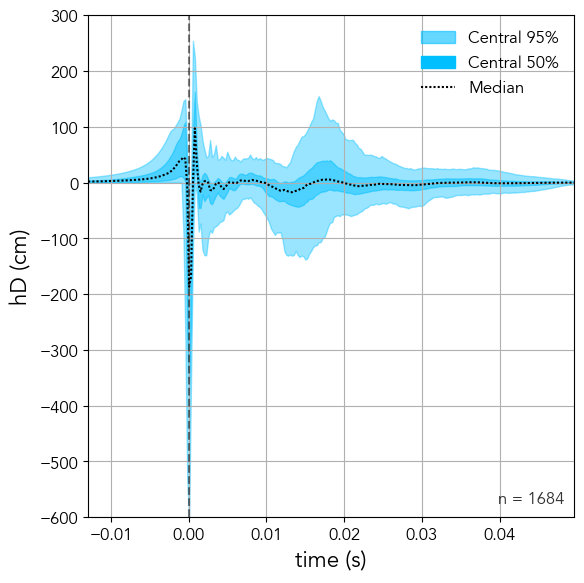

In [5]:
ccsn_dataset = CCSNData(noise=True, curriculum=True)
ccsn_dataset.plot_signal_distribution(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


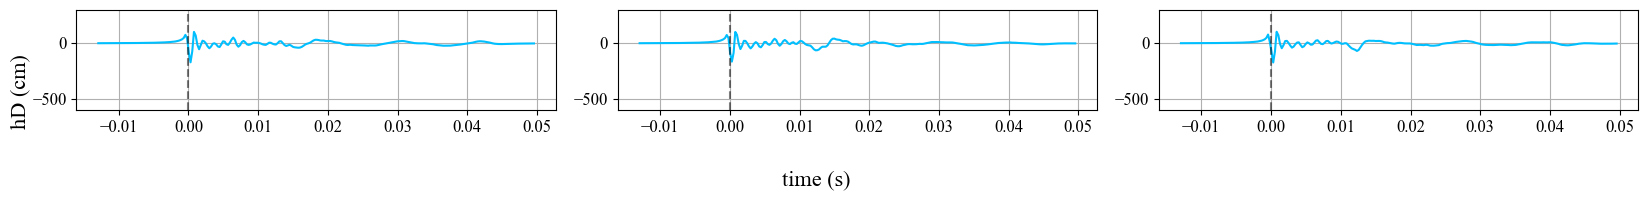

In [6]:
ccsn_dataset.plot_signal_grid(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_grid.svg")

In [7]:
toy=False

### Train VAE + Flow


Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A(km)', 'Ye_c_b', 'omega_0(rad|s)']
First few parameter values:
   beta1_IC_b  A(km)  Ye_c_b  omega_0(rad|s)
1    0.000749    634  0.2465             0.5
2    0.002987    634  0.2465             1.0
3    0.006661    634  0.2465             1.5
4    0.011734    634  0.2465             2.0
5    0.017965    634  0.2465             2.5

Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A(km)', 'Ye_c_b', 'omega_0(rad|s)']
First few parameter values:
   beta1_IC_b  A(km)  Ye_c_b  omega_0(rad|s)
1    0.000749    634  0.2465             0.5
2    0.002987    634  0.2465             1.0
3    0.006661    634  0.2465             1.5
4    0.011734    634  0.2465             2.0
5    0.017965    634  0.2465             2.5
Training samples: 1516
Validation samples: 168


Epochs:   0%|          | 0/256 [00:00<?, ?it/s]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1

Epoch 1/256 | Train Loss: 169.8943 | Val Loss: 86.4419


Epochs:   1%|          | 2/256 [00:05<11:01,  2.61s/it]

Epoch 2/256 | Train Loss: 69.6563 | Val Loss: 62.9924


Epochs:   1%|          | 3/256 [00:07<10:32,  2.50s/it]

Epoch 3/256 | Train Loss: 57.2048 | Val Loss: 55.4765


Epochs:   2%|▏         | 4/256 [00:10<10:15,  2.44s/it]

Epoch 4/256 | Train Loss: 51.5078 | Val Loss: 53.5344


Epochs:   2%|▏         | 5/256 [00:12<10:01,  2.40s/it]

Epoch 5/256 | Train Loss: 48.3711 | Val Loss: 51.1853


Epochs:   2%|▏         | 6/256 [00:14<09:50,  2.36s/it]

Epoch 6/256 | Train Loss: 46.2226 | Val Loss: 48.6883


Epochs:   3%|▎         | 7/256 [00:16<09:42,  2.34s/it]

Epoch 7/256 | Train Loss: 44.6228 | Val Loss: 46.8262


Epochs:   3%|▎         | 8/256 [00:19<09:29,  2.30s/it]

Epoch 8/256 | Train Loss: 43.3927 | Val Loss: 46.0070


Epochs:   4%|▎         | 9/256 [00:21<09:27,  2.30s/it]

Epoch 9/256 | Train Loss: 42.1920 | Val Loss: 44.2411


Epochs:   4%|▍         | 10/256 [00:23<09:25,  2.30s/it]

Epoch 10/256 | Train Loss: 40.8654 | Val Loss: 43.7302


Epochs:   4%|▍         | 11/256 [00:26<09:20,  2.29s/it]

Epoch 11/256 | Train Loss: 40.4818 | Val Loss: 43.9007


Epochs:   5%|▍         | 12/256 [00:28<09:20,  2.30s/it]

Epoch 12/256 | Train Loss: 39.1999 | Val Loss: 42.1849


Epochs:   5%|▌         | 13/256 [00:30<09:18,  2.30s/it]

Epoch 13/256 | Train Loss: 38.3365 | Val Loss: 42.2551


Epochs:   5%|▌         | 14/256 [00:32<09:15,  2.29s/it]

Epoch 14/256 | Train Loss: 37.7701 | Val Loss: 41.9520


Epochs:   6%|▌         | 15/256 [00:35<09:14,  2.30s/it]

Epoch 15/256 | Train Loss: 37.1649 | Val Loss: 41.4706
Epoch 16/256 | Train Loss: 37.0925 | Val Loss: 41.0421
Generated signals shape: (32, 256)
Epoch 16/256 | Train Loss: 37.0925 | Val Loss: 41.0421
Generated signals shape: (32, 256)


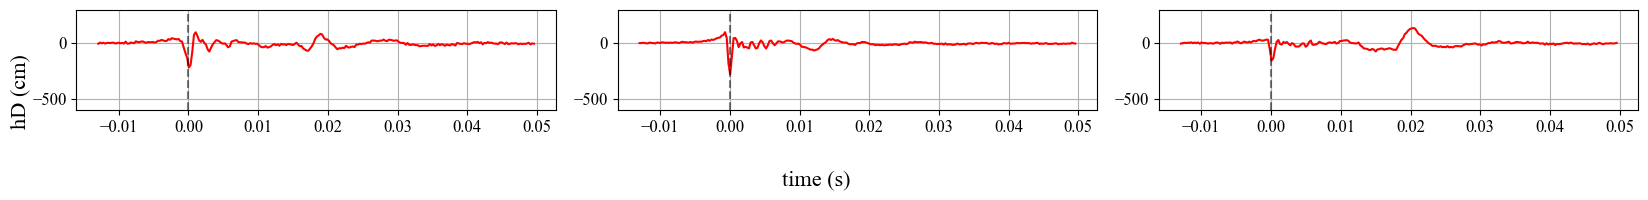

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


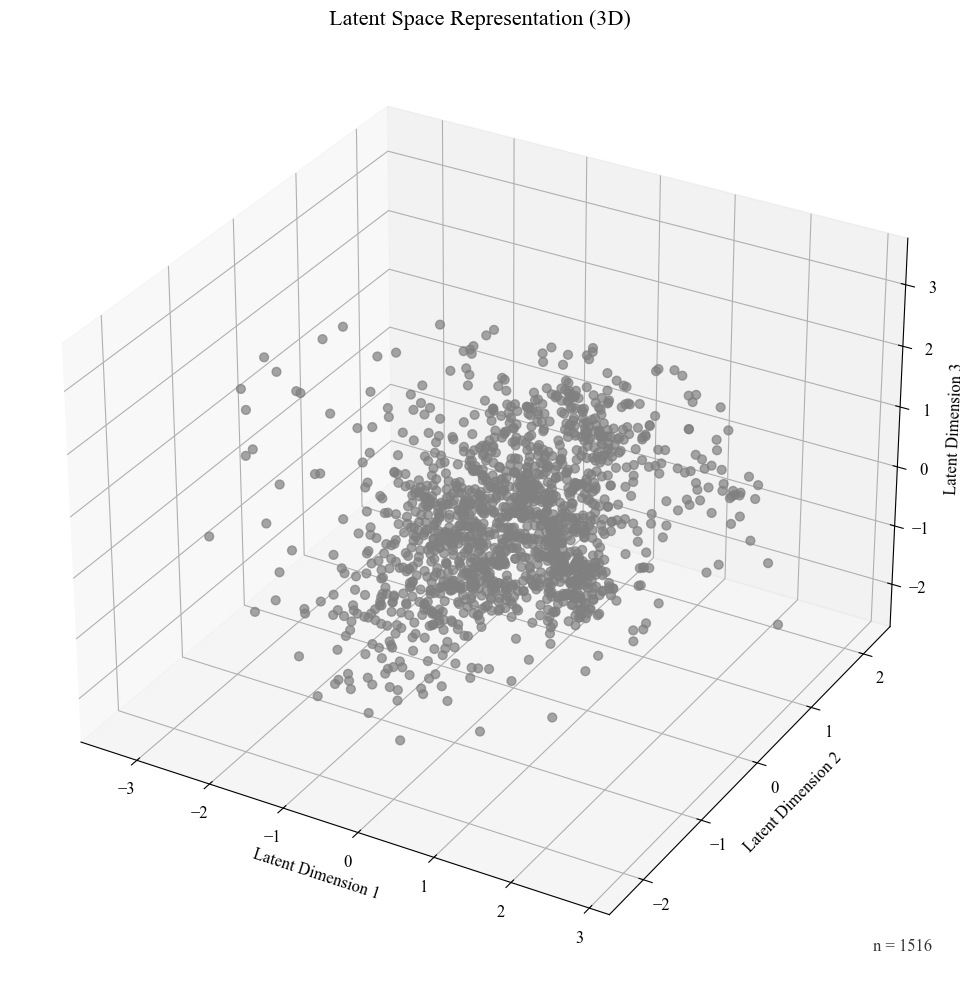

Epochs:   6%|▋         | 16/256 [00:39<11:10,  2.80s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 17/256 | Train Loss: 36.9098 | Val Loss: 41.3591


Epochs:   7%|▋         | 18/256 [00:43<10:11,  2.57s/it]

Epoch 18/256 | Train Loss: 36.1505 | Val Loss: 41.0169


Epochs:   7%|▋         | 19/256 [00:46<09:54,  2.51s/it]

Epoch 19/256 | Train Loss: 35.8917 | Val Loss: 40.6991


Epochs:   8%|▊         | 20/256 [00:48<09:37,  2.45s/it]

Epoch 20/256 | Train Loss: 35.8671 | Val Loss: 38.9547


Epochs:   8%|▊         | 21/256 [00:50<09:24,  2.40s/it]

Epoch 21/256 | Train Loss: 35.4324 | Val Loss: 40.8627


Epochs:   9%|▊         | 22/256 [00:53<09:26,  2.42s/it]

Epoch 22/256 | Train Loss: 35.0005 | Val Loss: 38.9377


Epochs:   9%|▉         | 23/256 [00:55<09:15,  2.38s/it]

Epoch 23/256 | Train Loss: 34.8519 | Val Loss: 39.4527


Epochs:   9%|▉         | 24/256 [00:57<09:06,  2.35s/it]

Epoch 24/256 | Train Loss: 34.4448 | Val Loss: 38.4973


Epochs:  10%|▉         | 25/256 [01:00<08:58,  2.33s/it]

Epoch 25/256 | Train Loss: 34.4768 | Val Loss: 39.0638


Epochs:  10%|█         | 26/256 [01:02<08:54,  2.33s/it]

Epoch 26/256 | Train Loss: 33.9296 | Val Loss: 38.3013


Epochs:  11%|█         | 27/256 [01:04<08:56,  2.34s/it]

Epoch 27/256 | Train Loss: 33.7935 | Val Loss: 38.1203


Epochs:  11%|█         | 28/256 [01:07<08:50,  2.33s/it]

Epoch 28/256 | Train Loss: 33.8614 | Val Loss: 39.3820


Epochs:  11%|█▏        | 29/256 [01:09<08:45,  2.32s/it]

Epoch 29/256 | Train Loss: 33.4285 | Val Loss: 37.6078


Epochs:  12%|█▏        | 30/256 [01:11<08:41,  2.31s/it]

Epoch 30/256 | Train Loss: 33.2826 | Val Loss: 37.8711


Epochs:  12%|█▏        | 31/256 [01:14<08:38,  2.30s/it]

Epoch 31/256 | Train Loss: 33.3923 | Val Loss: 38.3538
Epoch 32/256 | Train Loss: 32.9238 | Val Loss: 38.4286
Generated signals shape: (32, 256)
Epoch 32/256 | Train Loss: 32.9238 | Val Loss: 38.4286
Generated signals shape: (32, 256)


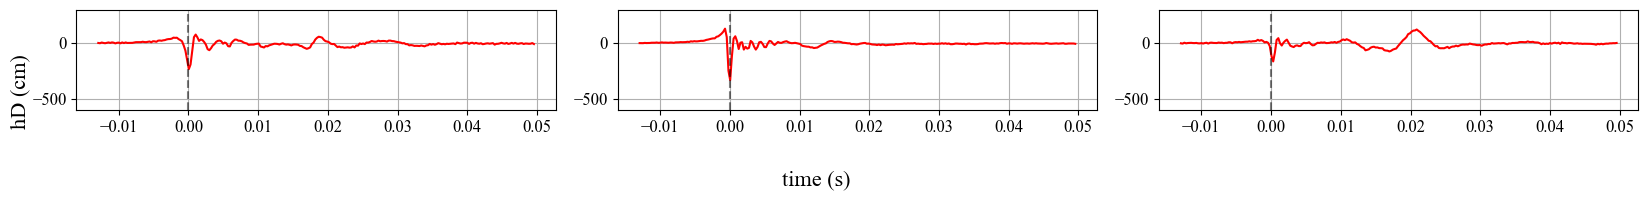

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


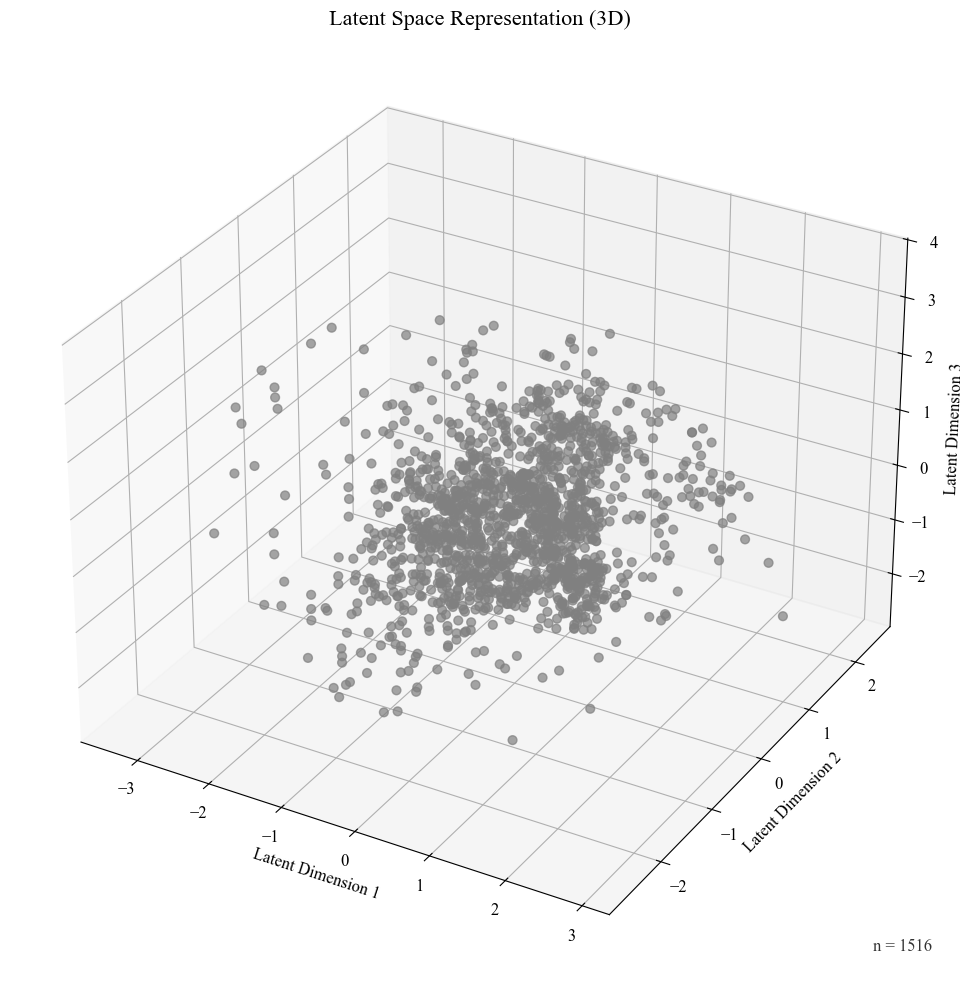

Epochs:  12%|█▎        | 32/256 [01:18<10:36,  2.84s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 33/256 | Train Loss: 32.8754 | Val Loss: 38.2377


Epochs:  13%|█▎        | 34/256 [01:22<09:29,  2.56s/it]

Epoch 34/256 | Train Loss: 32.9826 | Val Loss: 37.0547


Epochs:  14%|█▎        | 35/256 [01:25<09:16,  2.52s/it]

Epoch 35/256 | Train Loss: 32.7003 | Val Loss: 37.8265


Epochs:  14%|█▍        | 36/256 [01:27<08:59,  2.45s/it]

Epoch 36/256 | Train Loss: 32.4520 | Val Loss: 37.4351


Epochs:  14%|█▍        | 37/256 [01:29<08:51,  2.43s/it]

Epoch 37/256 | Train Loss: 32.3810 | Val Loss: 36.1950


Epochs:  15%|█▍        | 38/256 [01:32<08:40,  2.39s/it]

Epoch 38/256 | Train Loss: 32.2510 | Val Loss: 37.3618


Epochs:  15%|█▌        | 39/256 [01:34<08:37,  2.38s/it]

Epoch 39/256 | Train Loss: 32.2835 | Val Loss: 36.9981


Epochs:  16%|█▌        | 40/256 [01:36<08:24,  2.34s/it]

Epoch 40/256 | Train Loss: 32.1739 | Val Loss: 37.1654


Epochs:  16%|█▌        | 41/256 [01:39<08:24,  2.34s/it]

Epoch 41/256 | Train Loss: 32.4230 | Val Loss: 38.2229


Epochs:  16%|█▋        | 42/256 [01:41<08:20,  2.34s/it]

Epoch 42/256 | Train Loss: 31.6937 | Val Loss: 36.3266


Epochs:  17%|█▋        | 43/256 [01:43<08:19,  2.35s/it]

Epoch 43/256 | Train Loss: 31.4277 | Val Loss: 37.5627


Epochs:  17%|█▋        | 44/256 [01:46<08:20,  2.36s/it]

Epoch 44/256 | Train Loss: 31.5807 | Val Loss: 37.7831


Epochs:  18%|█▊        | 45/256 [01:48<08:14,  2.34s/it]

Epoch 45/256 | Train Loss: 31.2037 | Val Loss: 36.5598


Epochs:  18%|█▊        | 46/256 [01:50<08:14,  2.35s/it]

Epoch 46/256 | Train Loss: 31.4200 | Val Loss: 37.0569


Epochs:  18%|█▊        | 47/256 [01:53<08:14,  2.36s/it]

Epoch 47/256 | Train Loss: 31.4256 | Val Loss: 37.1484
Epoch 48/256 | Train Loss: 31.1198 | Val Loss: 37.0271
Generated signals shape: (32, 256)
Epoch 48/256 | Train Loss: 31.1198 | Val Loss: 37.0271
Generated signals shape: (32, 256)


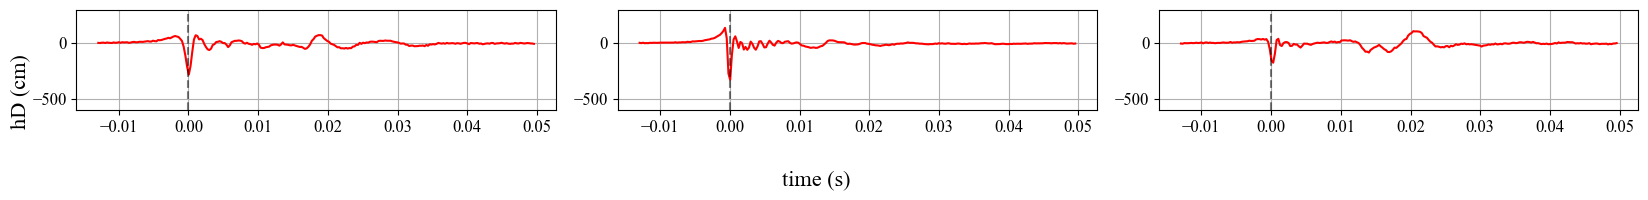

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


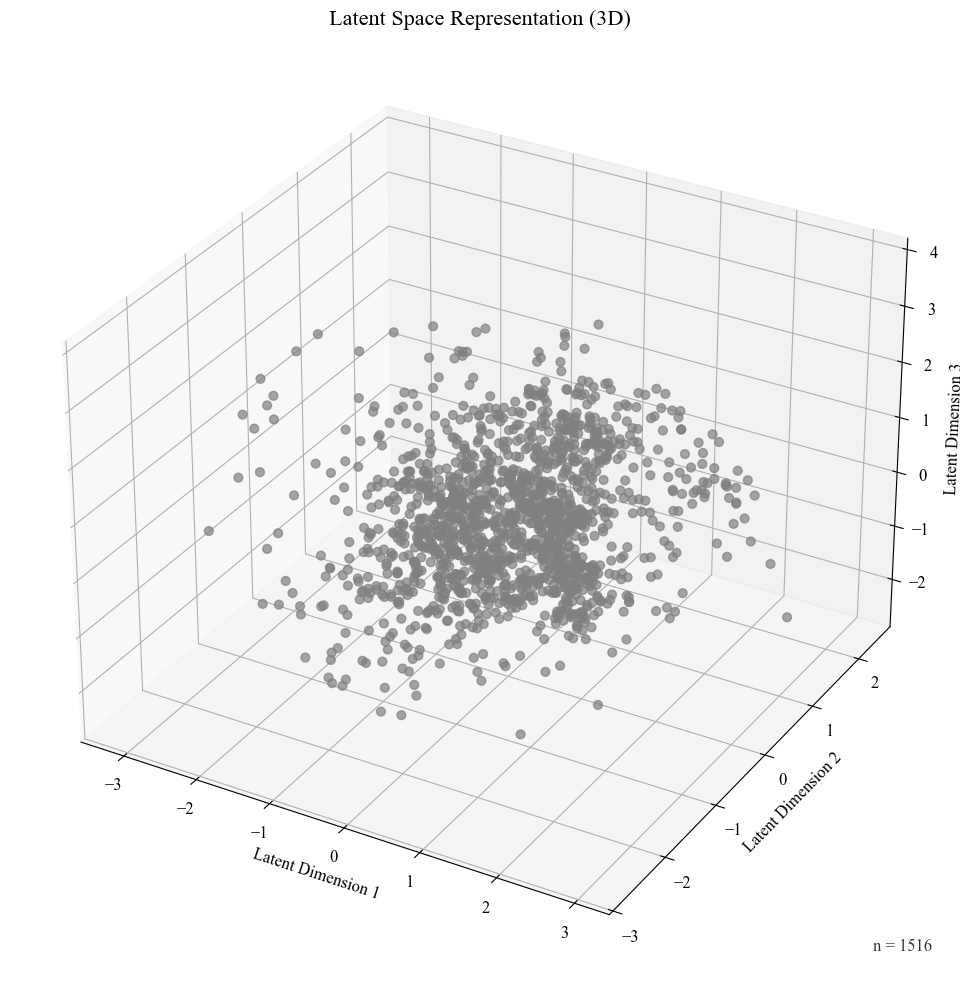

Epochs:  19%|█▉        | 48/256 [01:57<10:16,  2.96s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 49/256 | Train Loss: 29.4038 | Val Loss: 35.2090


Epochs:  20%|█▉        | 50/256 [02:02<09:09,  2.67s/it]

Epoch 50/256 | Train Loss: 29.0422 | Val Loss: 34.4664


Epochs:  20%|█▉        | 51/256 [02:04<08:51,  2.59s/it]

Epoch 51/256 | Train Loss: 28.8963 | Val Loss: 34.5011


Epochs:  20%|██        | 52/256 [02:07<08:38,  2.54s/it]

Epoch 52/256 | Train Loss: 28.7269 | Val Loss: 34.4971


Epochs:  21%|██        | 53/256 [02:09<08:38,  2.55s/it]

Epoch 53/256 | Train Loss: 28.6974 | Val Loss: 34.5037


Epochs:  21%|██        | 54/256 [02:12<08:27,  2.51s/it]

Epoch 54/256 | Train Loss: 28.5489 | Val Loss: 34.1214


Epochs:  21%|██▏       | 55/256 [02:14<08:28,  2.53s/it]

Epoch 55/256 | Train Loss: 28.4846 | Val Loss: 34.8561


Epochs:  22%|██▏       | 56/256 [02:17<08:26,  2.53s/it]

Epoch 56/256 | Train Loss: 28.3536 | Val Loss: 34.3007


Epochs:  22%|██▏       | 57/256 [02:19<08:15,  2.49s/it]

Epoch 57/256 | Train Loss: 28.3441 | Val Loss: 33.7080


Epochs:  23%|██▎       | 58/256 [02:22<08:02,  2.44s/it]

Epoch 58/256 | Train Loss: 28.4783 | Val Loss: 34.2643


Epochs:  23%|██▎       | 59/256 [02:24<07:54,  2.41s/it]

Epoch 59/256 | Train Loss: 28.4749 | Val Loss: 34.3652


Epochs:  23%|██▎       | 60/256 [02:26<07:53,  2.42s/it]

Epoch 60/256 | Train Loss: 28.3715 | Val Loss: 34.2752


Epochs:  24%|██▍       | 61/256 [02:29<07:51,  2.42s/it]

Epoch 61/256 | Train Loss: 28.2938 | Val Loss: 34.0046


Epochs:  24%|██▍       | 62/256 [02:31<07:48,  2.41s/it]

Epoch 62/256 | Train Loss: 28.2732 | Val Loss: 34.1772


Epochs:  25%|██▍       | 63/256 [02:34<07:51,  2.44s/it]

Epoch 63/256 | Train Loss: 28.1579 | Val Loss: 34.2703
Epoch 64/256 | Train Loss: 27.8643 | Val Loss: 34.3608
Generated signals shape: (32, 256)
Epoch 64/256 | Train Loss: 27.8643 | Val Loss: 34.3608
Generated signals shape: (32, 256)


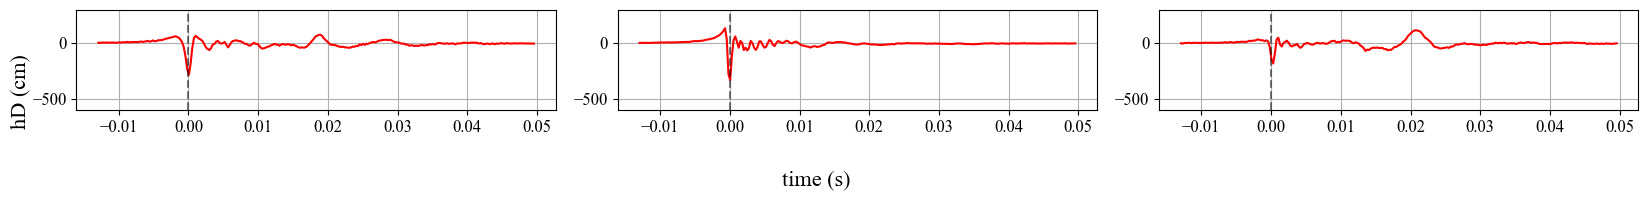

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


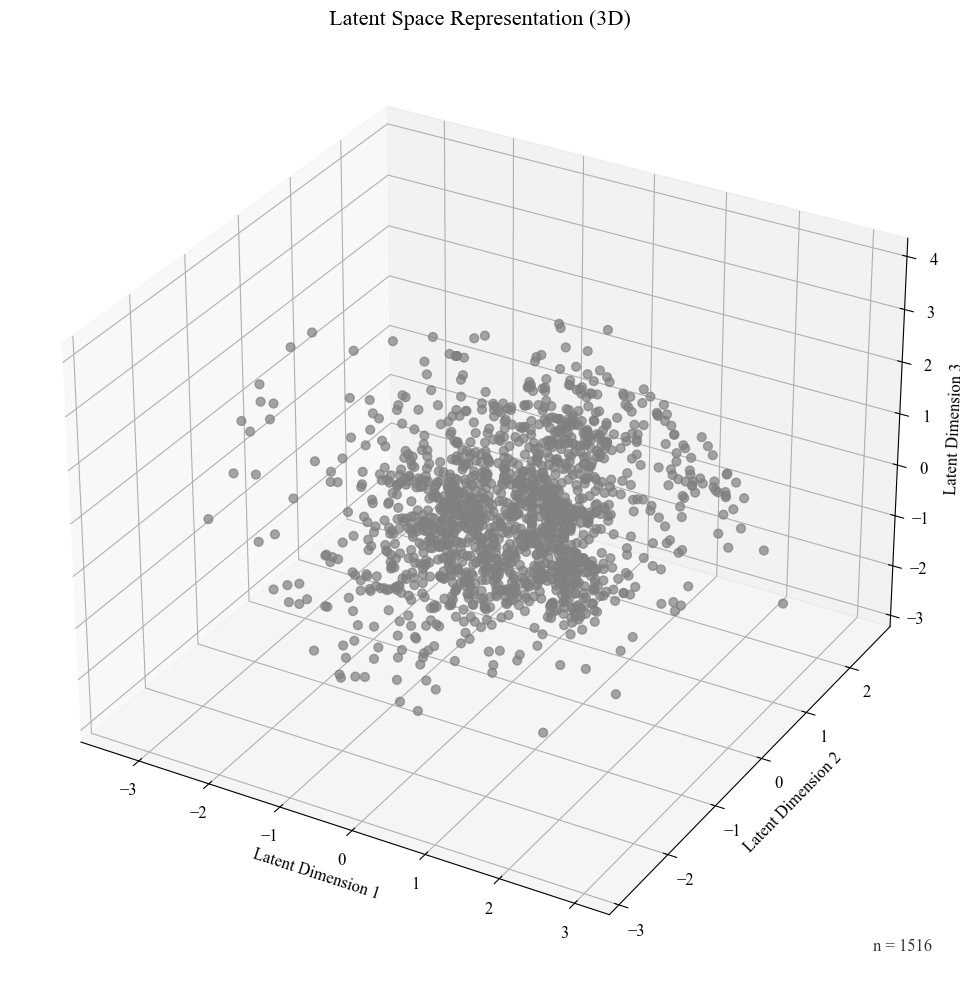

Epochs:  25%|██▌       | 64/256 [02:38<09:40,  3.03s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 65/256 | Train Loss: 27.9696 | Val Loss: 34.8351


Epochs:  26%|██▌       | 66/256 [02:43<08:34,  2.71s/it]

Epoch 66/256 | Train Loss: 28.0862 | Val Loss: 34.0922


Epochs:  26%|██▌       | 67/256 [02:45<08:15,  2.62s/it]

Epoch 67/256 | Train Loss: 28.1154 | Val Loss: 34.4999


Epochs:  27%|██▋       | 68/256 [02:48<08:01,  2.56s/it]

Epoch 68/256 | Train Loss: 27.8270 | Val Loss: 33.6199


Epochs:  27%|██▋       | 69/256 [02:50<07:53,  2.53s/it]

Epoch 69/256 | Train Loss: 28.0343 | Val Loss: 34.0042


Epochs:  27%|██▋       | 70/256 [02:53<07:44,  2.49s/it]

Epoch 70/256 | Train Loss: 27.8052 | Val Loss: 34.2577


Epochs:  28%|██▊       | 71/256 [02:55<07:37,  2.47s/it]

Epoch 71/256 | Train Loss: 27.8306 | Val Loss: 34.2133


Epochs:  28%|██▊       | 72/256 [02:57<07:28,  2.44s/it]

Epoch 72/256 | Train Loss: 27.7519 | Val Loss: 34.1715


Epochs:  29%|██▊       | 73/256 [03:00<07:27,  2.44s/it]

Epoch 73/256 | Train Loss: 27.7185 | Val Loss: 34.3089


Epochs:  29%|██▉       | 74/256 [03:02<07:21,  2.43s/it]

Epoch 74/256 | Train Loss: 27.6883 | Val Loss: 34.8094


Epochs:  29%|██▉       | 75/256 [03:05<07:25,  2.46s/it]

Epoch 75/256 | Train Loss: 27.7892 | Val Loss: 33.6790


Epochs:  30%|██▉       | 76/256 [03:07<07:28,  2.49s/it]

Epoch 76/256 | Train Loss: 27.8170 | Val Loss: 33.6560


Epochs:  30%|███       | 77/256 [03:10<07:27,  2.50s/it]

Epoch 77/256 | Train Loss: 27.5319 | Val Loss: 34.0061


Epochs:  30%|███       | 78/256 [03:12<07:26,  2.51s/it]

Epoch 78/256 | Train Loss: 27.5800 | Val Loss: 34.0088


Epochs:  31%|███       | 79/256 [03:15<07:25,  2.52s/it]

Epoch 79/256 | Train Loss: 27.3463 | Val Loss: 33.6158
Epoch 80/256 | Train Loss: 27.3617 | Val Loss: 33.7152
Generated signals shape: (32, 256)
Epoch 80/256 | Train Loss: 27.3617 | Val Loss: 33.7152
Generated signals shape: (32, 256)


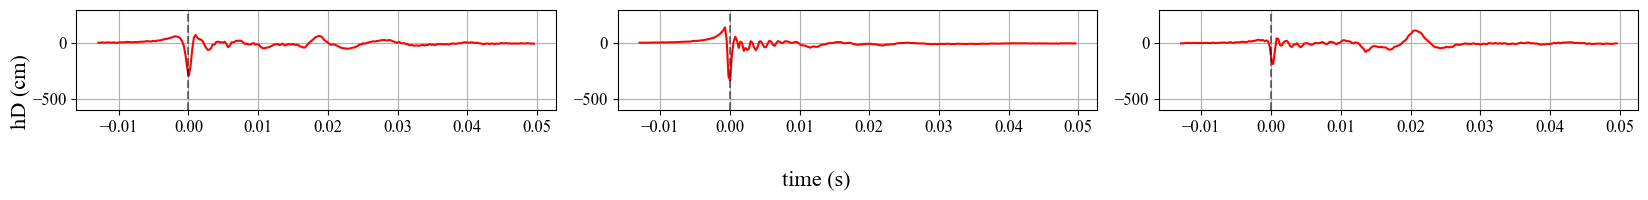

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


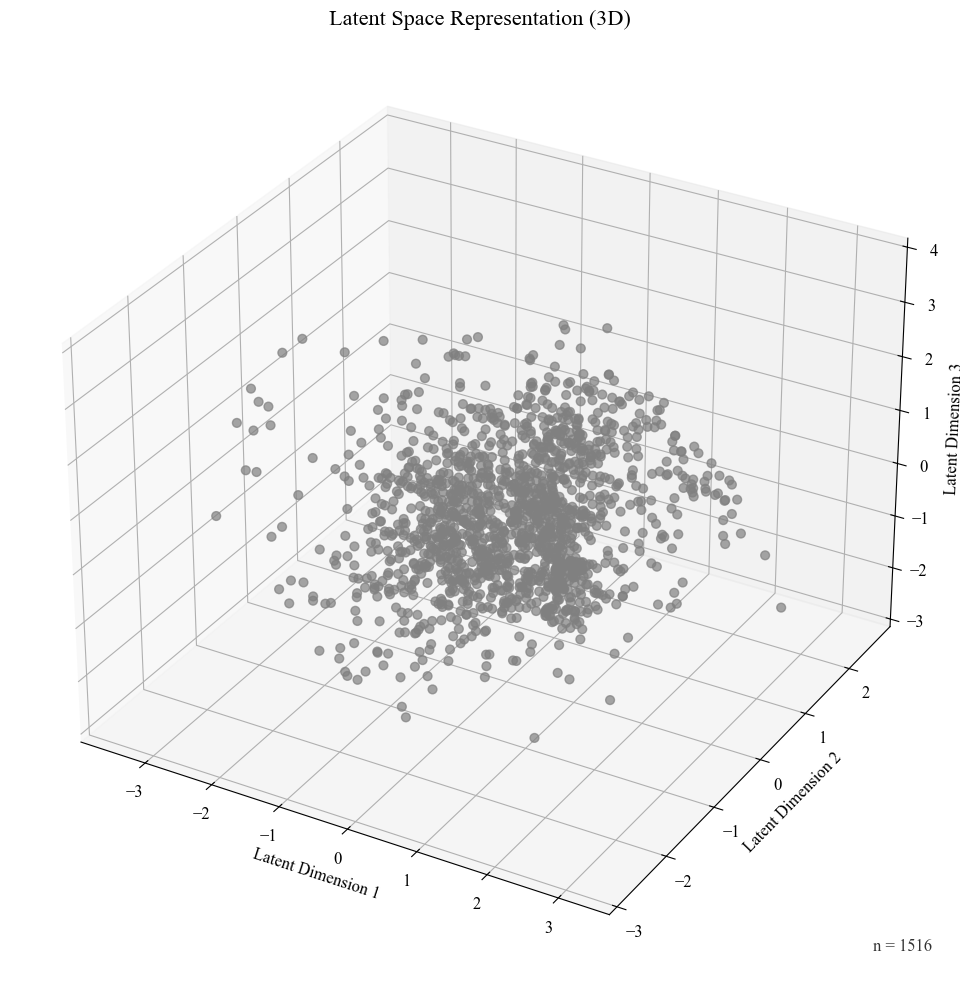

Epochs:  31%|███▏      | 80/256 [03:19<09:11,  3.13s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 81/256 | Train Loss: 27.3792 | Val Loss: 33.4706


Epochs:  32%|███▏      | 82/256 [03:24<08:02,  2.77s/it]

Epoch 82/256 | Train Loss: 27.3594 | Val Loss: 33.8356


Epochs:  32%|███▏      | 83/256 [03:27<07:46,  2.69s/it]

Epoch 83/256 | Train Loss: 27.5101 | Val Loss: 33.5442


Epochs:  33%|███▎      | 84/256 [03:29<07:36,  2.65s/it]

Epoch 84/256 | Train Loss: 27.2299 | Val Loss: 34.0738


Epochs:  33%|███▎      | 85/256 [03:32<07:30,  2.64s/it]

Epoch 85/256 | Train Loss: 27.2014 | Val Loss: 33.9356


Epochs:  34%|███▎      | 86/256 [03:35<07:24,  2.61s/it]

Epoch 86/256 | Train Loss: 27.3328 | Val Loss: 33.4539


Epochs:  34%|███▍      | 87/256 [03:37<07:19,  2.60s/it]

Epoch 87/256 | Train Loss: 27.2096 | Val Loss: 34.0067


Epochs:  34%|███▍      | 88/256 [03:40<07:14,  2.58s/it]

Epoch 88/256 | Train Loss: 27.0924 | Val Loss: 33.9892


Epochs:  35%|███▍      | 89/256 [03:42<07:08,  2.57s/it]

Epoch 89/256 | Train Loss: 27.2066 | Val Loss: 33.7571


Epochs:  35%|███▌      | 90/256 [03:45<07:04,  2.56s/it]

Epoch 90/256 | Train Loss: 27.1613 | Val Loss: 34.0575


Epochs:  36%|███▌      | 91/256 [03:47<06:59,  2.54s/it]

Epoch 91/256 | Train Loss: 27.2103 | Val Loss: 33.7579


Epochs:  36%|███▌      | 92/256 [03:50<06:57,  2.55s/it]

Epoch 92/256 | Train Loss: 27.1571 | Val Loss: 33.5090


Epochs:  36%|███▋      | 93/256 [03:52<06:54,  2.54s/it]

Epoch 93/256 | Train Loss: 27.1811 | Val Loss: 33.9172


Epochs:  37%|███▋      | 94/256 [03:55<06:52,  2.54s/it]

Epoch 94/256 | Train Loss: 26.9543 | Val Loss: 33.6770


Epochs:  37%|███▋      | 95/256 [03:57<06:48,  2.54s/it]

Epoch 95/256 | Train Loss: 27.1652 | Val Loss: 33.4836
Epoch 96/256 | Train Loss: 26.8168 | Val Loss: 33.4033
Generated signals shape: (32, 256)
Epoch 96/256 | Train Loss: 26.8168 | Val Loss: 33.4033
Generated signals shape: (32, 256)


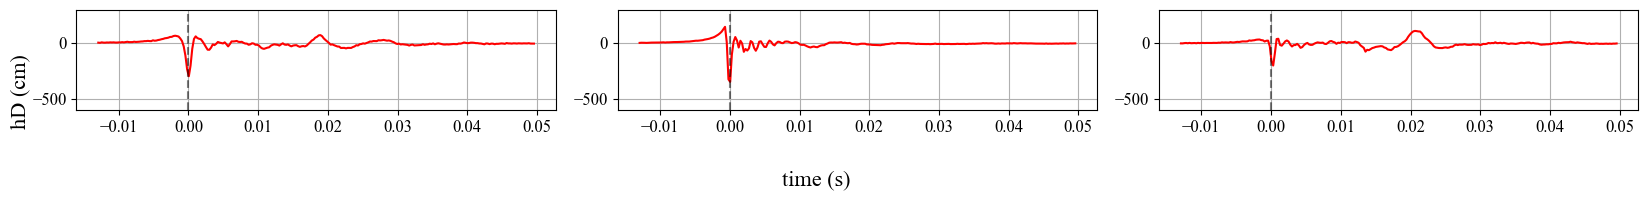

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


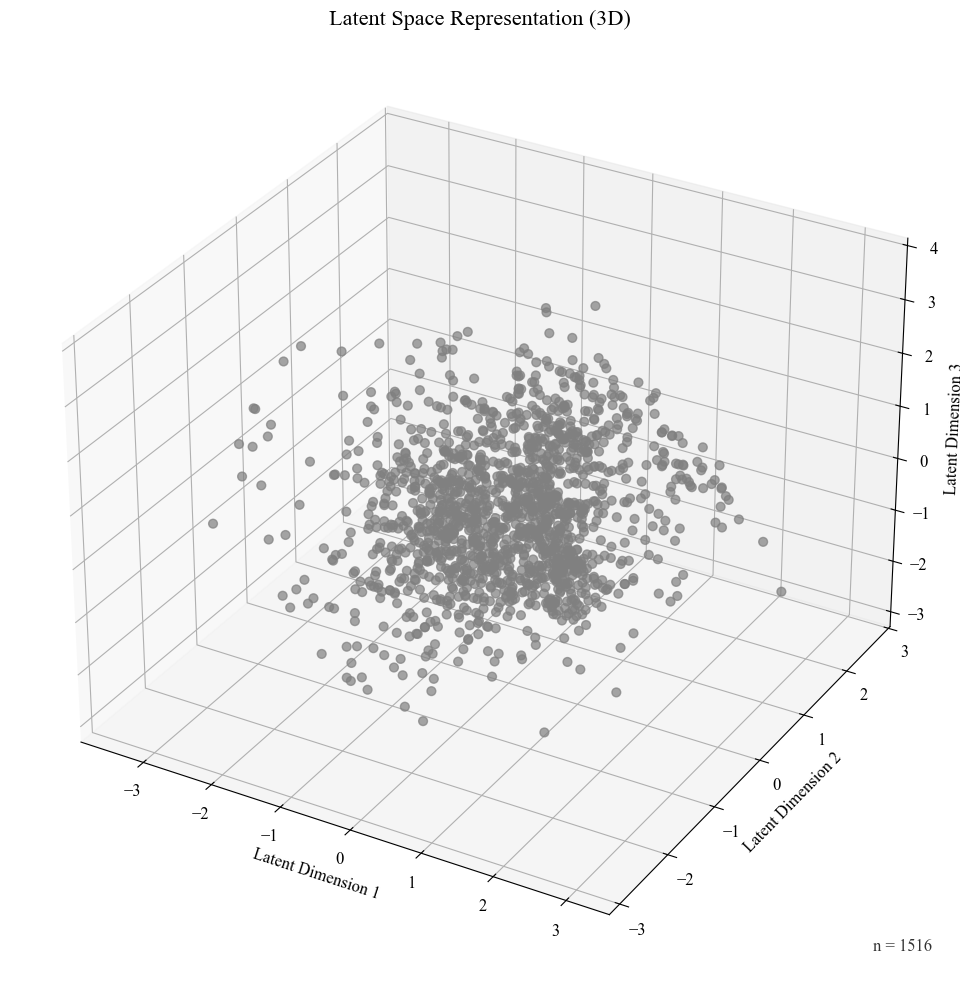

Epochs:  38%|███▊      | 96/256 [04:02<08:22,  3.14s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 *

Epoch 97/256 | Train Loss: 26.8670 | Val Loss: 34.0210


Epochs:  38%|███▊      | 98/256 [04:07<07:15,  2.76s/it]

Epoch 98/256 | Train Loss: 26.9261 | Val Loss: 33.8337


Epochs:  39%|███▊      | 99/256 [04:09<07:00,  2.68s/it]

Epoch 99/256 | Train Loss: 26.7929 | Val Loss: 33.2433


Epochs:  39%|███▉      | 100/256 [04:12<06:53,  2.65s/it]

Epoch 100/256 | Train Loss: 26.6952 | Val Loss: 33.5777


Epochs:  39%|███▉      | 101/256 [04:14<06:43,  2.60s/it]

Epoch 101/256 | Train Loss: 26.8142 | Val Loss: 34.0967


Epochs:  40%|███▉      | 102/256 [04:17<06:34,  2.56s/it]

Epoch 102/256 | Train Loss: 26.7959 | Val Loss: 33.6030


Epochs:  40%|████      | 103/256 [04:19<06:30,  2.55s/it]

Epoch 103/256 | Train Loss: 26.6851 | Val Loss: 33.3806


Epochs:  41%|████      | 104/256 [04:22<06:24,  2.53s/it]

Epoch 104/256 | Train Loss: 26.7013 | Val Loss: 33.6570


Epochs:  41%|████      | 105/256 [04:24<06:25,  2.55s/it]

Epoch 105/256 | Train Loss: 26.5029 | Val Loss: 33.3105


Epochs:  41%|████▏     | 106/256 [04:27<06:20,  2.54s/it]

Epoch 106/256 | Train Loss: 26.7107 | Val Loss: 34.0288


Epochs:  42%|████▏     | 107/256 [04:29<06:15,  2.52s/it]

Epoch 107/256 | Train Loss: 26.5525 | Val Loss: 32.6723


Epochs:  42%|████▏     | 108/256 [04:32<06:12,  2.52s/it]

Epoch 108/256 | Train Loss: 26.4556 | Val Loss: 32.8600


Epochs:  43%|████▎     | 109/256 [04:34<06:09,  2.51s/it]

Epoch 109/256 | Train Loss: 26.7383 | Val Loss: 33.2883


Epochs:  43%|████▎     | 110/256 [04:37<06:07,  2.52s/it]

Epoch 110/256 | Train Loss: 26.5047 | Val Loss: 33.4711


Epochs:  43%|████▎     | 111/256 [04:39<06:02,  2.50s/it]

Epoch 111/256 | Train Loss: 26.5106 | Val Loss: 34.4268
Epoch 112/256 | Train Loss: 26.6802 | Val Loss: 33.9694
Generated signals shape: (32, 256)
Epoch 112/256 | Train Loss: 26.6802 | Val Loss: 33.9694
Generated signals shape: (32, 256)


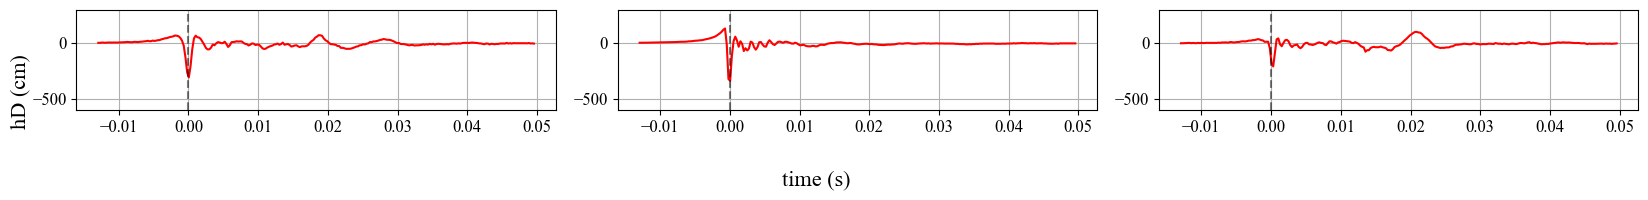

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


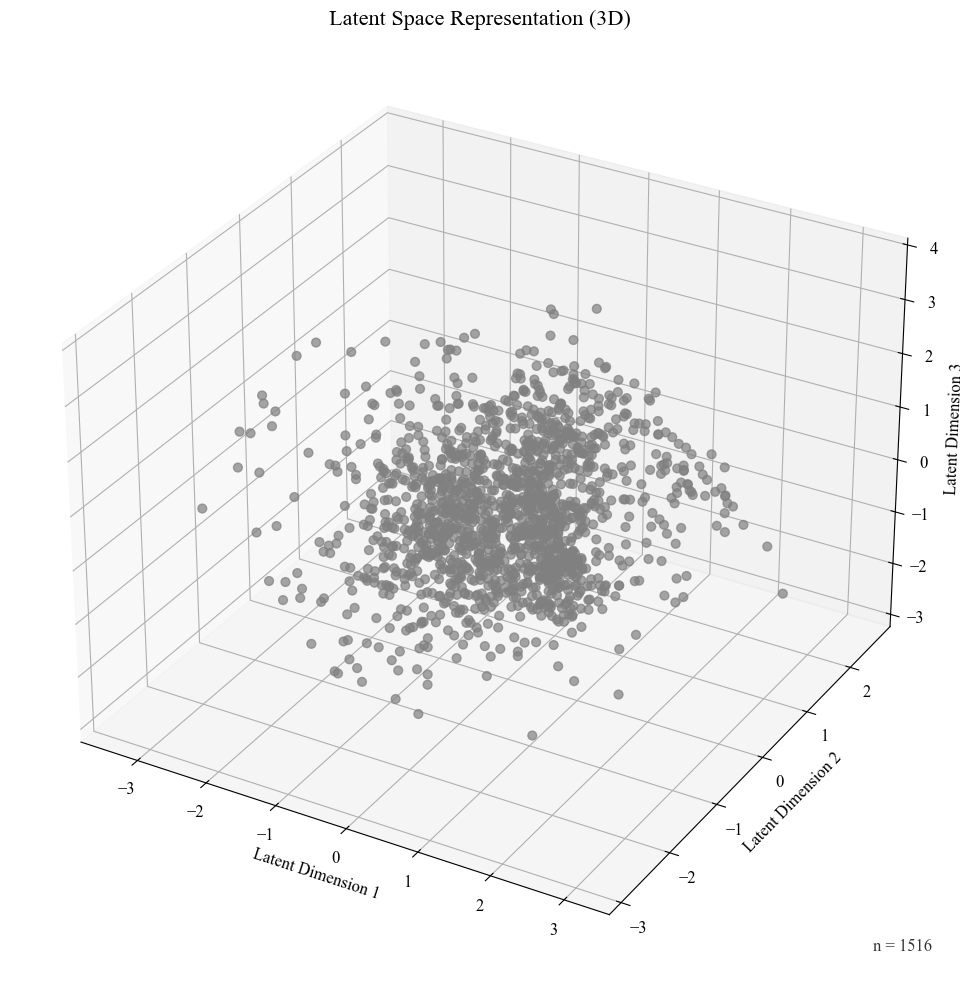

Epochs:  44%|████▍     | 112/256 [04:44<07:31,  3.13s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 113/256 | Train Loss: 26.4378 | Val Loss: 34.2543


Epochs:  45%|████▍     | 114/256 [04:49<06:30,  2.75s/it]

Epoch 114/256 | Train Loss: 26.6029 | Val Loss: 33.3862


Epochs:  45%|████▍     | 115/256 [04:51<06:17,  2.68s/it]

Epoch 115/256 | Train Loss: 26.2998 | Val Loss: 33.9895


Epochs:  45%|████▌     | 116/256 [04:54<06:08,  2.63s/it]

Epoch 116/256 | Train Loss: 26.4737 | Val Loss: 33.1246


Epochs:  46%|████▌     | 117/256 [04:56<06:01,  2.60s/it]

Epoch 117/256 | Train Loss: 26.3368 | Val Loss: 33.7768


Epochs:  46%|████▌     | 118/256 [04:59<05:53,  2.56s/it]

Epoch 118/256 | Train Loss: 26.5185 | Val Loss: 33.3215


Epochs:  46%|████▋     | 119/256 [05:01<05:48,  2.54s/it]

Epoch 119/256 | Train Loss: 25.5736 | Val Loss: 32.2917


Epochs:  47%|████▋     | 120/256 [05:04<05:42,  2.52s/it]

Epoch 120/256 | Train Loss: 25.2430 | Val Loss: 32.9756


Epochs:  47%|████▋     | 121/256 [05:06<05:38,  2.50s/it]

Epoch 121/256 | Train Loss: 25.1917 | Val Loss: 32.7038


Epochs:  48%|████▊     | 122/256 [05:09<05:33,  2.49s/it]

Epoch 122/256 | Train Loss: 25.0652 | Val Loss: 32.5178


Epochs:  48%|████▊     | 123/256 [05:11<05:31,  2.49s/it]

Epoch 123/256 | Train Loss: 25.0296 | Val Loss: 32.6367


Epochs:  48%|████▊     | 124/256 [05:14<05:25,  2.47s/it]

Epoch 124/256 | Train Loss: 25.2772 | Val Loss: 32.5331


Epochs:  49%|████▉     | 125/256 [05:16<05:21,  2.46s/it]

Epoch 125/256 | Train Loss: 25.0451 | Val Loss: 32.6097


Epochs:  49%|████▉     | 126/256 [05:18<05:17,  2.44s/it]

Epoch 126/256 | Train Loss: 25.0687 | Val Loss: 31.8730


Epochs:  50%|████▉     | 127/256 [05:21<05:13,  2.43s/it]

Epoch 127/256 | Train Loss: 25.0305 | Val Loss: 32.4539
Epoch 128/256 | Train Loss: 24.9896 | Val Loss: 32.6363
Generated signals shape: (32, 256)
Epoch 128/256 | Train Loss: 24.9896 | Val Loss: 32.6363
Generated signals shape: (32, 256)


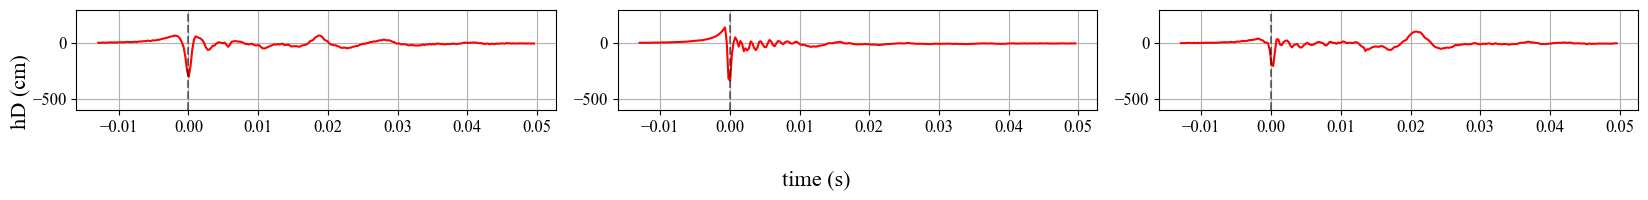

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


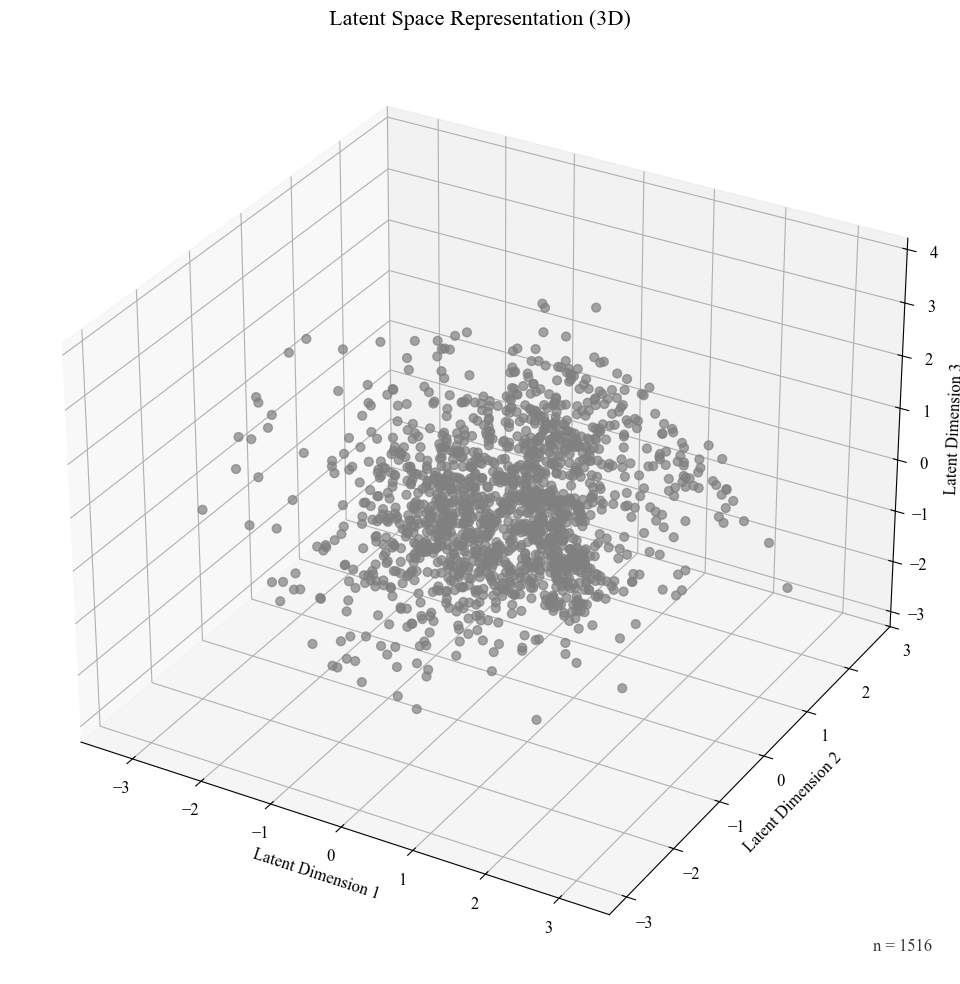

Epochs:  50%|█████     | 128/256 [05:25<06:22,  2.99s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 129/256 | Train Loss: 24.9905 | Val Loss: 32.6633


Epochs:  51%|█████     | 130/256 [05:30<05:35,  2.66s/it]

Epoch 130/256 | Train Loss: 24.9210 | Val Loss: 33.0090


Epochs:  51%|█████     | 131/256 [05:32<05:22,  2.58s/it]

Epoch 131/256 | Train Loss: 24.9157 | Val Loss: 32.6812


Epochs:  52%|█████▏    | 132/256 [05:35<05:13,  2.52s/it]

Epoch 132/256 | Train Loss: 24.9315 | Val Loss: 32.6382


Epochs:  52%|█████▏    | 133/256 [05:37<05:04,  2.48s/it]

Epoch 133/256 | Train Loss: 24.9054 | Val Loss: 32.7626


Epochs:  52%|█████▏    | 134/256 [05:39<04:57,  2.44s/it]

Epoch 134/256 | Train Loss: 25.0547 | Val Loss: 32.4221


Epochs:  53%|█████▎    | 135/256 [05:42<04:57,  2.46s/it]

Epoch 135/256 | Train Loss: 24.8199 | Val Loss: 33.1652


Epochs:  53%|█████▎    | 136/256 [05:45<05:05,  2.54s/it]

Epoch 136/256 | Train Loss: 25.0183 | Val Loss: 32.3844


Epochs:  54%|█████▎    | 137/256 [05:47<04:58,  2.51s/it]

Epoch 137/256 | Train Loss: 24.8612 | Val Loss: 32.5108


Epochs:  54%|█████▍    | 138/256 [05:49<04:53,  2.48s/it]

Epoch 138/256 | Train Loss: 24.4051 | Val Loss: 31.6330


Epochs:  54%|█████▍    | 139/256 [05:52<04:46,  2.45s/it]

Epoch 139/256 | Train Loss: 24.3689 | Val Loss: 31.4783


Epochs:  55%|█████▍    | 140/256 [05:54<04:39,  2.41s/it]

Epoch 140/256 | Train Loss: 24.3849 | Val Loss: 31.9270


Epochs:  55%|█████▌    | 141/256 [05:56<04:35,  2.39s/it]

Epoch 141/256 | Train Loss: 24.4583 | Val Loss: 31.5284


Epochs:  55%|█████▌    | 142/256 [05:59<04:25,  2.33s/it]

Epoch 142/256 | Train Loss: 24.1733 | Val Loss: 31.6641


Epochs:  56%|█████▌    | 143/256 [06:01<04:26,  2.36s/it]

Epoch 143/256 | Train Loss: 24.1915 | Val Loss: 32.6133
Epoch 144/256 | Train Loss: 24.1235 | Val Loss: 31.1184
Generated signals shape: (32, 256)
Epoch 144/256 | Train Loss: 24.1235 | Val Loss: 31.1184
Generated signals shape: (32, 256)


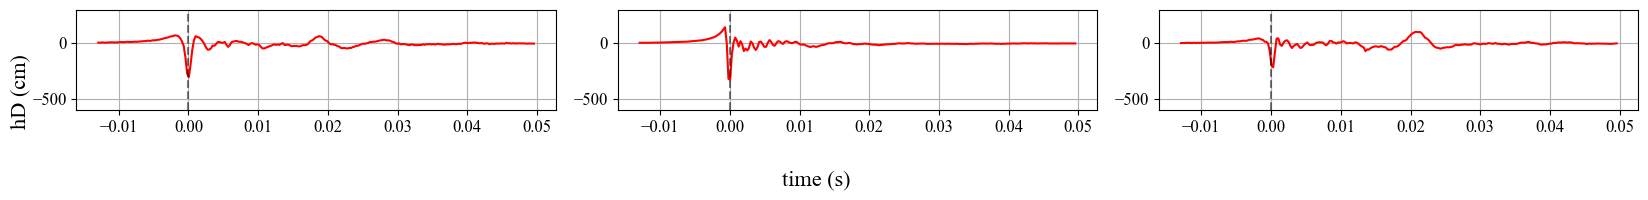

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


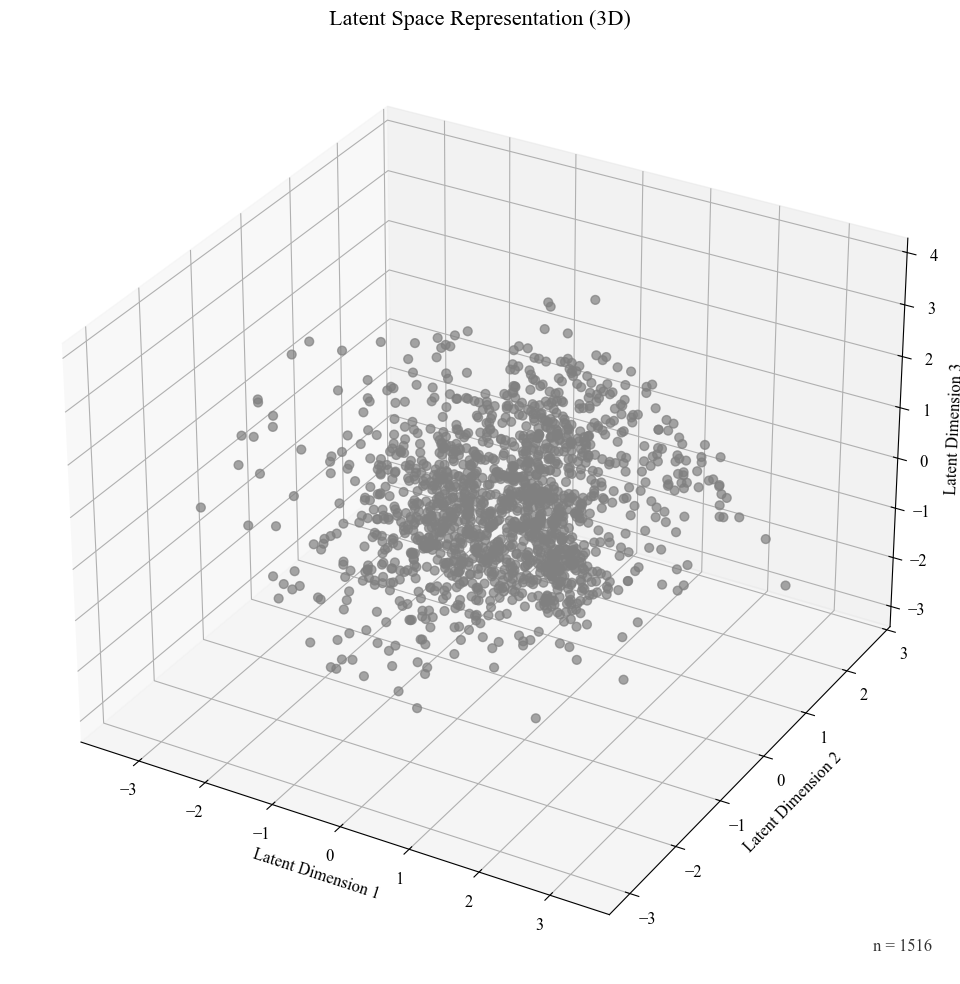

Epochs:  56%|█████▋    | 144/256 [06:06<05:42,  3.06s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 145/256 | Train Loss: 24.2593 | Val Loss: 31.5207


Epochs:  57%|█████▋    | 146/256 [06:10<04:47,  2.61s/it]

Epoch 146/256 | Train Loss: 24.0637 | Val Loss: 32.4012


Epochs:  57%|█████▋    | 147/256 [06:13<05:03,  2.79s/it]

Epoch 147/256 | Train Loss: 24.1687 | Val Loss: 32.0440


Epochs:  58%|█████▊    | 148/256 [06:16<04:48,  2.67s/it]

Epoch 148/256 | Train Loss: 24.3660 | Val Loss: 31.7014


Epochs:  58%|█████▊    | 149/256 [06:19<04:55,  2.76s/it]

Epoch 149/256 | Train Loss: 24.1991 | Val Loss: 32.1936


Epochs:  59%|█████▊    | 150/256 [06:23<05:28,  3.10s/it]

Epoch 150/256 | Train Loss: 24.1355 | Val Loss: 32.3544


Epochs:  59%|█████▉    | 151/256 [06:25<05:13,  2.99s/it]

Epoch 151/256 | Train Loss: 24.0664 | Val Loss: 32.2613


Epochs:  59%|█████▉    | 152/256 [06:28<05:09,  2.98s/it]

Epoch 152/256 | Train Loss: 24.2809 | Val Loss: 32.6601


Epochs:  60%|█████▉    | 153/256 [06:32<05:17,  3.09s/it]

Epoch 153/256 | Train Loss: 24.1337 | Val Loss: 31.4655


Epochs:  60%|██████    | 154/256 [06:35<05:27,  3.21s/it]

Epoch 154/256 | Train Loss: 24.0843 | Val Loss: 32.2067


Epochs:  61%|██████    | 155/256 [06:38<05:05,  3.02s/it]

Epoch 155/256 | Train Loss: 24.1571 | Val Loss: 32.1124


Epochs:  61%|██████    | 156/256 [06:40<04:43,  2.84s/it]

Epoch 156/256 | Train Loss: 23.9810 | Val Loss: 31.7088


Epochs:  61%|██████▏   | 157/256 [06:43<04:42,  2.86s/it]

Epoch 157/256 | Train Loss: 23.8369 | Val Loss: 31.7750


Epochs:  62%|██████▏   | 158/256 [06:46<04:36,  2.82s/it]

Epoch 158/256 | Train Loss: 23.9464 | Val Loss: 31.9179


Epochs:  62%|██████▏   | 159/256 [06:48<04:18,  2.67s/it]

Epoch 159/256 | Train Loss: 23.8383 | Val Loss: 31.9548
Epoch 160/256 | Train Loss: 23.8664 | Val Loss: 31.7065
Generated signals shape: (32, 256)
Epoch 160/256 | Train Loss: 23.8664 | Val Loss: 31.7065
Generated signals shape: (32, 256)


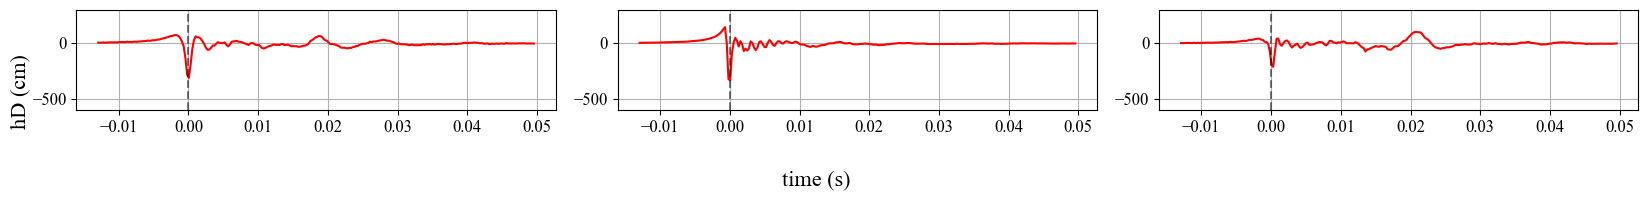

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


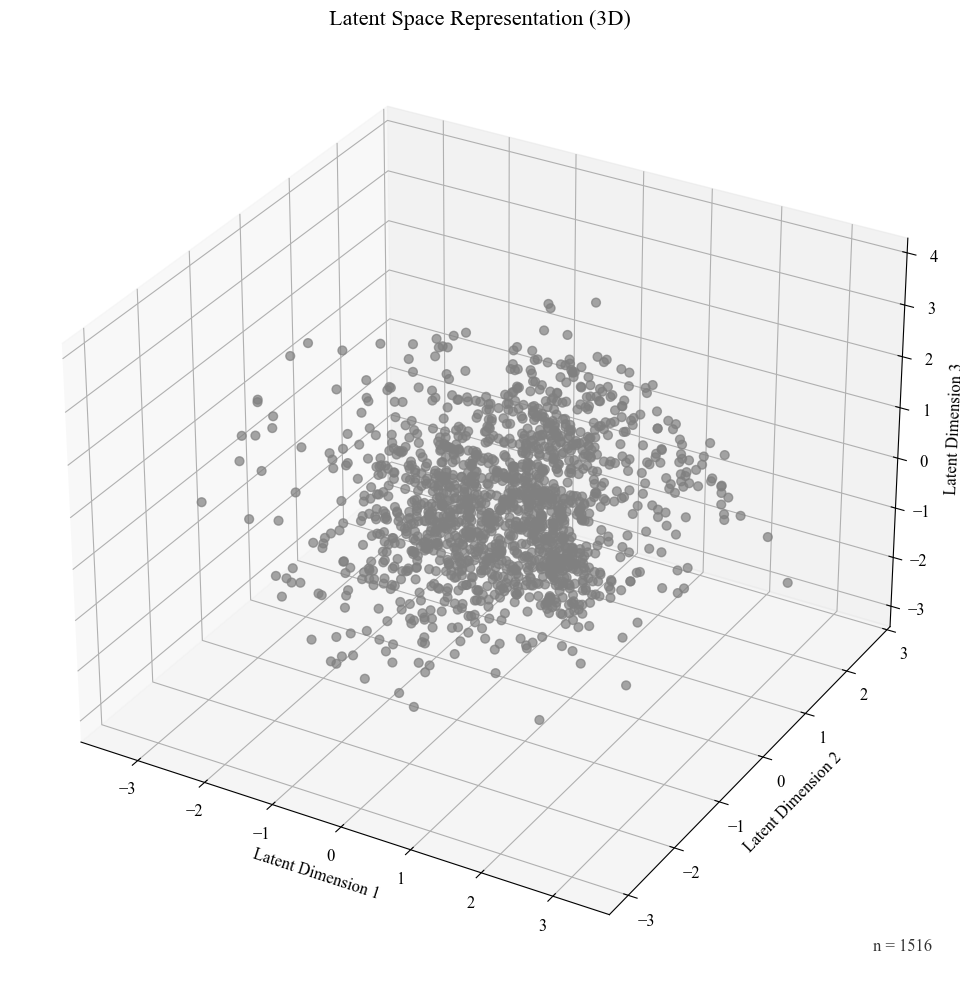

Epochs:  62%|██████▎   | 160/256 [06:53<05:25,  3.39s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 161/256 | Train Loss: 23.7557 | Val Loss: 31.9510


Epochs:  63%|██████▎   | 162/256 [06:58<04:26,  2.83s/it]

Epoch 162/256 | Train Loss: 23.7185 | Val Loss: 31.7074


Epochs:  64%|██████▎   | 163/256 [07:00<04:09,  2.68s/it]

Epoch 163/256 | Train Loss: 23.8478 | Val Loss: 31.9342


Epochs:  64%|██████▍   | 164/256 [07:02<03:58,  2.59s/it]

Epoch 164/256 | Train Loss: 23.8064 | Val Loss: 31.6459


Epochs:  64%|██████▍   | 165/256 [07:05<03:49,  2.52s/it]

Epoch 165/256 | Train Loss: 23.7511 | Val Loss: 32.0227


Epochs:  65%|██████▍   | 166/256 [07:07<03:41,  2.46s/it]

Epoch 166/256 | Train Loss: 23.8737 | Val Loss: 32.0602


Epochs:  65%|██████▌   | 167/256 [07:09<03:35,  2.42s/it]

Epoch 167/256 | Train Loss: 23.7406 | Val Loss: 31.6742


Epochs:  66%|██████▌   | 168/256 [07:12<03:36,  2.46s/it]

Epoch 168/256 | Train Loss: 23.6648 | Val Loss: 31.6852


Epochs:  66%|██████▌   | 169/256 [07:15<03:38,  2.51s/it]

Epoch 169/256 | Train Loss: 23.7000 | Val Loss: 31.8384


Epochs:  66%|██████▋   | 170/256 [07:17<03:31,  2.46s/it]

Epoch 170/256 | Train Loss: 23.7650 | Val Loss: 31.7202


Epochs:  67%|██████▋   | 171/256 [07:19<03:24,  2.41s/it]

Epoch 171/256 | Train Loss: 23.5871 | Val Loss: 31.6789


Epochs:  67%|██████▋   | 172/256 [07:22<03:20,  2.38s/it]

Epoch 172/256 | Train Loss: 23.7610 | Val Loss: 31.6366


Epochs:  68%|██████▊   | 173/256 [07:24<03:15,  2.36s/it]

Epoch 173/256 | Train Loss: 23.5885 | Val Loss: 31.1771


Epochs:  68%|██████▊   | 174/256 [07:26<03:11,  2.33s/it]

Epoch 174/256 | Train Loss: 23.7132 | Val Loss: 32.1560


Epochs:  68%|██████▊   | 175/256 [07:28<03:09,  2.34s/it]

Epoch 175/256 | Train Loss: 23.7756 | Val Loss: 31.9304
Epoch 176/256 | Train Loss: 23.8470 | Val Loss: 31.5820
Generated signals shape: (32, 256)
Epoch 176/256 | Train Loss: 23.8470 | Val Loss: 31.5820
Generated signals shape: (32, 256)


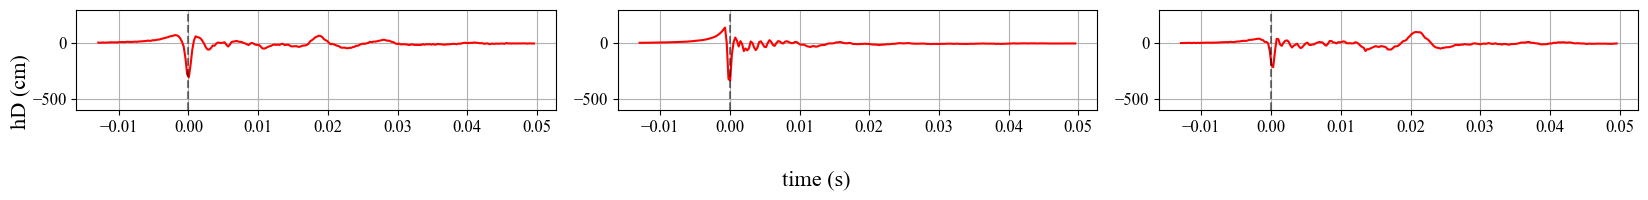

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


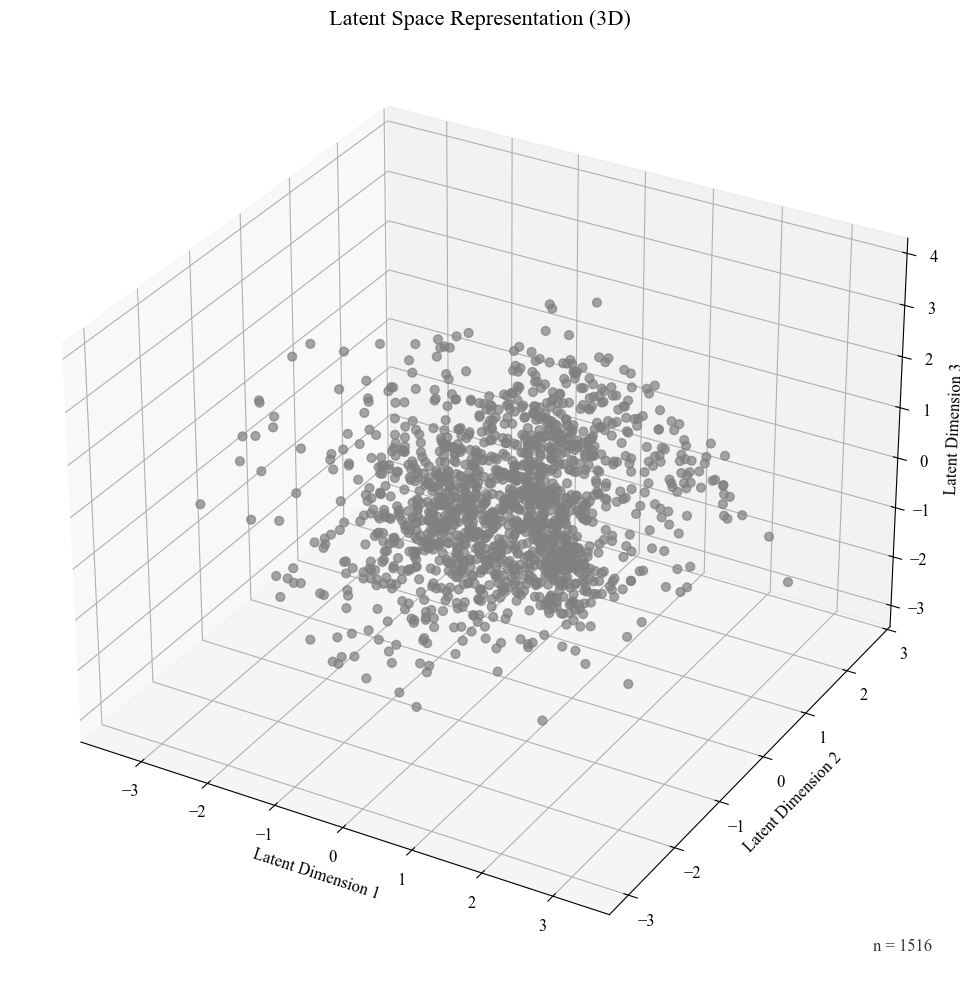

Epochs:  69%|██████▉   | 176/256 [07:33<04:02,  3.03s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 177/256 | Train Loss: 23.4997 | Val Loss: 31.6694


Epochs:  70%|██████▉   | 178/256 [07:38<03:24,  2.62s/it]

Epoch 178/256 | Train Loss: 23.5672 | Val Loss: 31.9774


Epochs:  70%|██████▉   | 179/256 [07:40<03:14,  2.53s/it]

Epoch 179/256 | Train Loss: 23.4749 | Val Loss: 31.7123


Epochs:  70%|███████   | 180/256 [07:43<03:18,  2.61s/it]

Epoch 180/256 | Train Loss: 23.5903 | Val Loss: 31.6783


Epochs:  71%|███████   | 181/256 [07:45<03:13,  2.58s/it]

Epoch 181/256 | Train Loss: 23.5283 | Val Loss: 31.5169


Epochs:  71%|███████   | 182/256 [07:47<03:04,  2.49s/it]

Epoch 182/256 | Train Loss: 23.5350 | Val Loss: 32.1360


Epochs:  71%|███████▏  | 183/256 [07:50<02:59,  2.46s/it]

Epoch 183/256 | Train Loss: 23.6933 | Val Loss: 32.3773


Epochs:  72%|███████▏  | 184/256 [07:52<02:54,  2.43s/it]

Epoch 184/256 | Train Loss: 23.5535 | Val Loss: 31.3699


Epochs:  72%|███████▏  | 185/256 [07:55<02:52,  2.43s/it]

Epoch 185/256 | Train Loss: 23.4749 | Val Loss: 32.4217


Epochs:  73%|███████▎  | 186/256 [07:57<02:58,  2.55s/it]

Epoch 186/256 | Train Loss: 23.6249 | Val Loss: 31.5609


Epochs:  73%|███████▎  | 187/256 [08:00<02:53,  2.51s/it]

Epoch 187/256 | Train Loss: 23.6741 | Val Loss: 31.5846


Epochs:  73%|███████▎  | 188/256 [08:03<02:55,  2.58s/it]

Epoch 188/256 | Train Loss: 23.5993 | Val Loss: 31.3525


Epochs:  74%|███████▍  | 189/256 [08:05<02:46,  2.49s/it]

Epoch 189/256 | Train Loss: 23.5589 | Val Loss: 32.2216


Epochs:  74%|███████▍  | 190/256 [08:08<02:48,  2.56s/it]

Epoch 190/256 | Train Loss: 23.6364 | Val Loss: 31.3905


Epochs:  75%|███████▍  | 191/256 [08:11<02:55,  2.69s/it]

Epoch 191/256 | Train Loss: 23.6439 | Val Loss: 31.5872
Epoch 192/256 | Train Loss: 23.4889 | Val Loss: 32.0967
Generated signals shape: (32, 256)
Epoch 192/256 | Train Loss: 23.4889 | Val Loss: 32.0967
Generated signals shape: (32, 256)


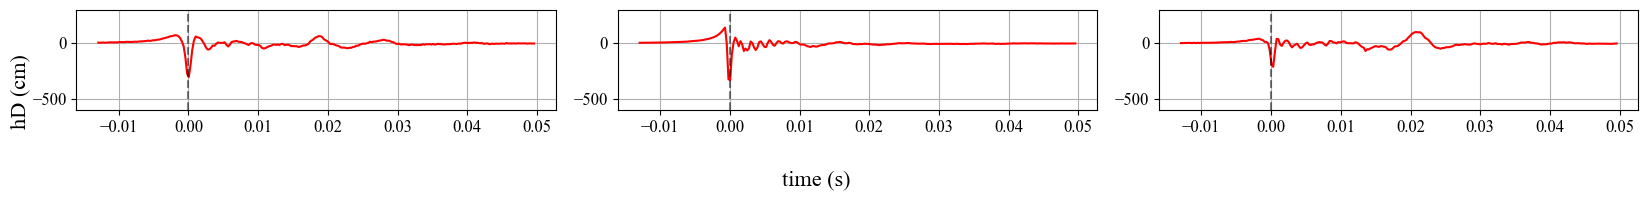

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


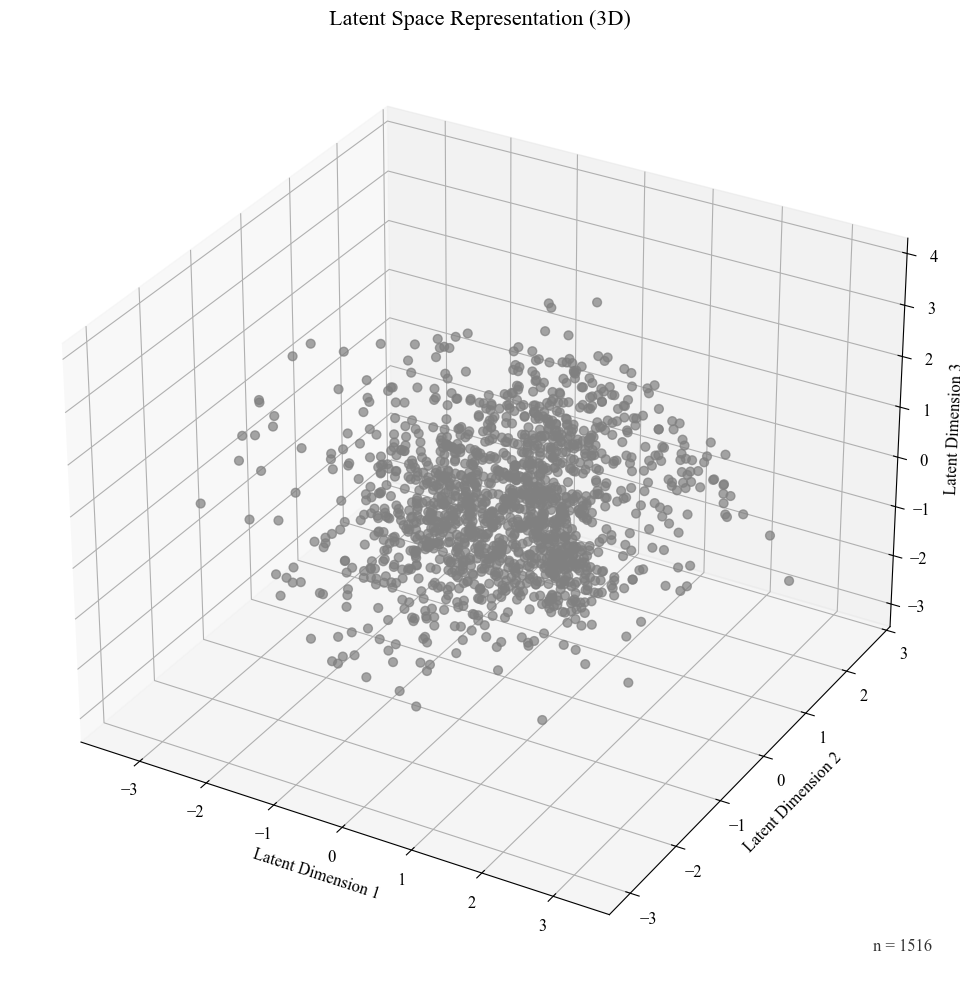

Epochs:  75%|███████▌  | 192/256 [08:16<03:36,  3.38s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 193/256 | Train Loss: 23.5240 | Val Loss: 32.4705


Epochs:  76%|███████▌  | 194/256 [08:20<02:50,  2.76s/it]

Epoch 194/256 | Train Loss: 23.6294 | Val Loss: 31.6897


Epochs:  76%|███████▌  | 195/256 [08:23<03:00,  2.96s/it]

Epoch 195/256 | Train Loss: 23.6301 | Val Loss: 31.7840


Epochs:  77%|███████▋  | 196/256 [08:26<02:52,  2.88s/it]

Epoch 196/256 | Train Loss: 23.6300 | Val Loss: 31.7214


Epochs:  77%|███████▋  | 197/256 [08:28<02:38,  2.69s/it]

Epoch 197/256 | Train Loss: 23.5463 | Val Loss: 31.4613


Epochs:  77%|███████▋  | 198/256 [08:31<02:35,  2.69s/it]

Epoch 198/256 | Train Loss: 23.6721 | Val Loss: 31.6435


Epochs:  78%|███████▊  | 199/256 [08:34<02:39,  2.79s/it]

Epoch 199/256 | Train Loss: 23.6134 | Val Loss: 31.7947


Epochs:  78%|███████▊  | 200/256 [08:37<02:35,  2.77s/it]

Epoch 200/256 | Train Loss: 23.6380 | Val Loss: 31.7325


Epochs:  79%|███████▊  | 201/256 [08:39<02:19,  2.54s/it]

Epoch 201/256 | Train Loss: 23.5084 | Val Loss: 31.8947


Epochs:  79%|███████▉  | 202/256 [08:41<02:16,  2.53s/it]

Epoch 202/256 | Train Loss: 23.6454 | Val Loss: 31.5411


Epochs:  79%|███████▉  | 203/256 [08:43<02:05,  2.36s/it]

Epoch 203/256 | Train Loss: 23.6573 | Val Loss: 32.0400


Epochs:  80%|███████▉  | 204/256 [08:46<02:06,  2.43s/it]

Epoch 204/256 | Train Loss: 23.5988 | Val Loss: 31.4879


Epochs:  80%|████████  | 205/256 [08:48<01:58,  2.32s/it]

Epoch 205/256 | Train Loss: 23.5735 | Val Loss: 31.7185


Epochs:  80%|████████  | 206/256 [08:50<02:01,  2.43s/it]

Epoch 206/256 | Train Loss: 23.6565 | Val Loss: 32.1376


Epochs:  81%|████████  | 207/256 [08:52<01:52,  2.29s/it]

Epoch 207/256 | Train Loss: 23.6497 | Val Loss: 31.7657
Epoch 208/256 | Train Loss: 23.6823 | Val Loss: 31.5567
Generated signals shape: (32, 256)
Epoch 208/256 | Train Loss: 23.6823 | Val Loss: 31.5567
Generated signals shape: (32, 256)


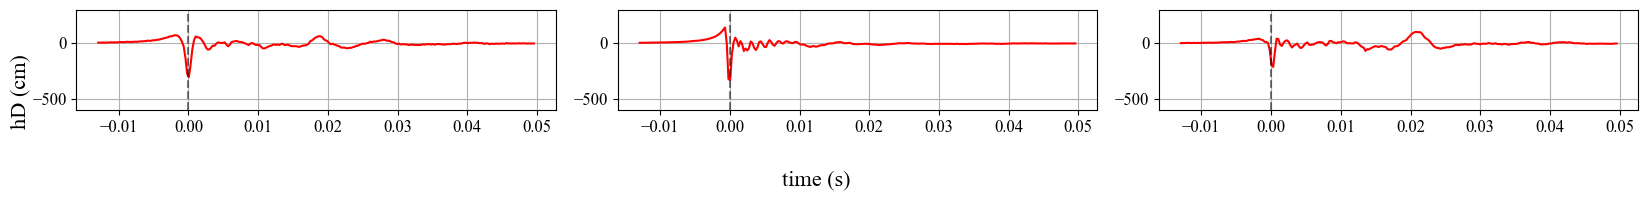

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


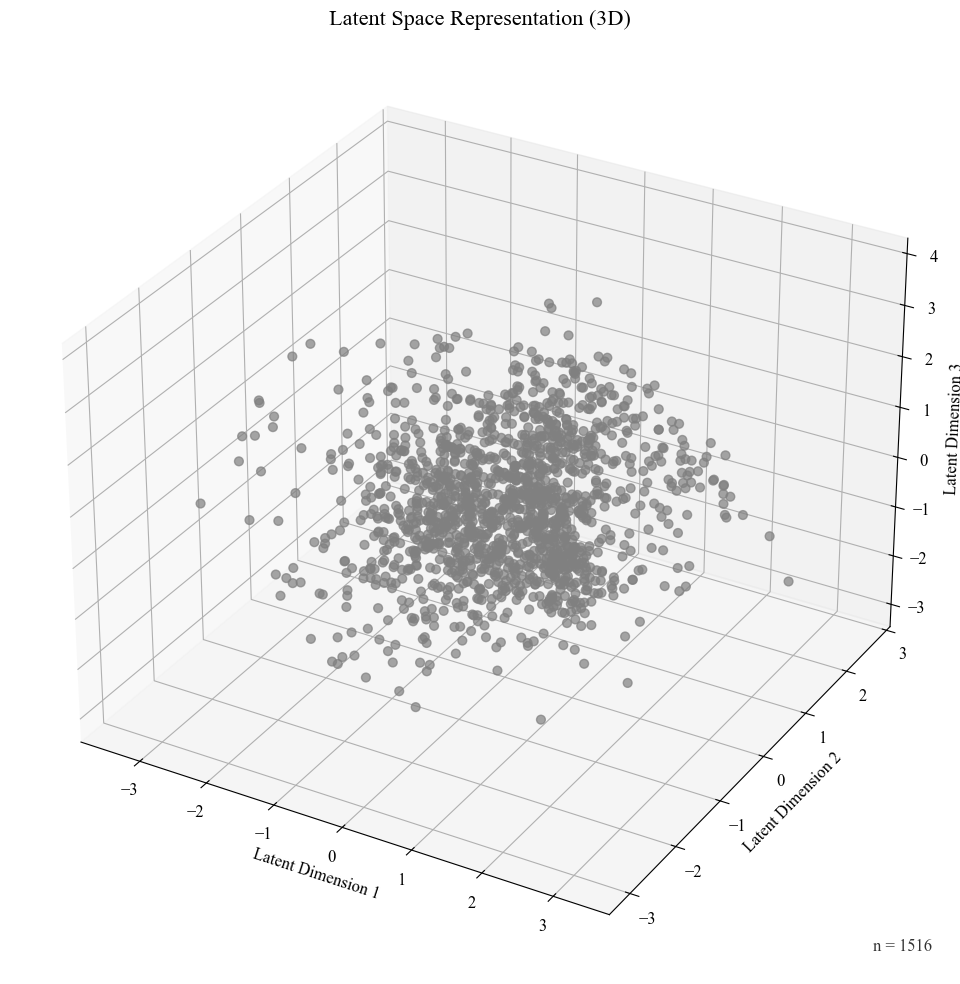

Epochs:  81%|████████▏ | 208/256 [08:58<02:29,  3.11s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 209/256 | Train Loss: 23.4722 | Val Loss: 32.1192


Epochs:  82%|████████▏ | 210/256 [09:01<01:56,  2.54s/it]

Epoch 210/256 | Train Loss: 23.5255 | Val Loss: 31.9190


Epochs:  82%|████████▏ | 211/256 [09:04<01:51,  2.48s/it]

Epoch 211/256 | Train Loss: 23.6114 | Val Loss: 31.5161


Epochs:  83%|████████▎ | 212/256 [09:06<01:43,  2.35s/it]

Epoch 212/256 | Train Loss: 23.6827 | Val Loss: 32.1551


Epochs:  83%|████████▎ | 213/256 [09:09<01:47,  2.49s/it]

Epoch 213/256 | Train Loss: 23.7623 | Val Loss: 31.6569


Epochs:  84%|████████▎ | 214/256 [09:12<01:51,  2.65s/it]

Epoch 214/256 | Train Loss: 23.5225 | Val Loss: 32.1098


Epochs:  84%|████████▍ | 215/256 [09:14<01:39,  2.44s/it]

Epoch 215/256 | Train Loss: 23.5185 | Val Loss: 32.0081


Epochs:  84%|████████▍ | 216/256 [09:16<01:34,  2.36s/it]

Epoch 216/256 | Train Loss: 23.6653 | Val Loss: 31.9261


Epochs:  85%|████████▍ | 217/256 [09:20<01:57,  3.01s/it]

Epoch 217/256 | Train Loss: 23.6645 | Val Loss: 31.7822


Epochs:  85%|████████▌ | 218/256 [09:24<02:06,  3.32s/it]

Epoch 218/256 | Train Loss: 23.7138 | Val Loss: 32.8529


Epochs:  86%|████████▌ | 219/256 [09:28<02:06,  3.42s/it]

Epoch 219/256 | Train Loss: 23.8857 | Val Loss: 31.9391


Epochs:  86%|████████▌ | 220/256 [09:31<01:53,  3.16s/it]

Epoch 220/256 | Train Loss: 23.7175 | Val Loss: 32.0817


Epochs:  86%|████████▋ | 221/256 [09:33<01:38,  2.82s/it]

Epoch 221/256 | Train Loss: 23.5954 | Val Loss: 31.7165


Epochs:  87%|████████▋ | 222/256 [09:35<01:31,  2.68s/it]

Epoch 222/256 | Train Loss: 23.6542 | Val Loss: 31.7843


Epochs:  87%|████████▋ | 223/256 [09:38<01:28,  2.68s/it]

Epoch 223/256 | Train Loss: 23.5945 | Val Loss: 32.6223
Epoch 224/256 | Train Loss: 23.5900 | Val Loss: 32.1395
Generated signals shape: (32, 256)
Epoch 224/256 | Train Loss: 23.5900 | Val Loss: 32.1395
Generated signals shape: (32, 256)


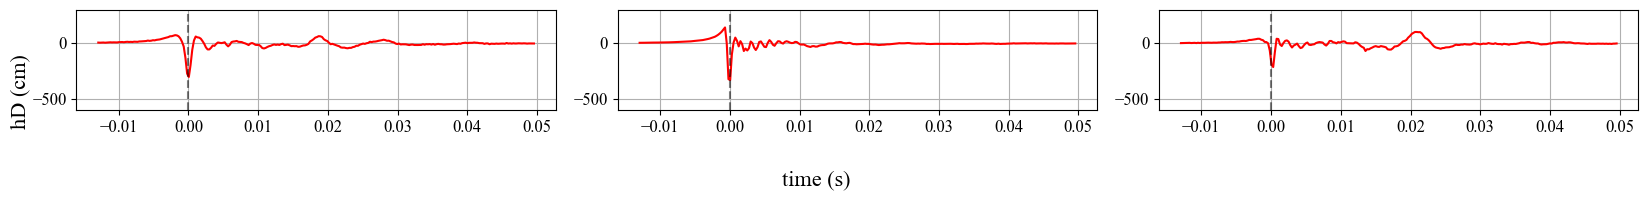

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


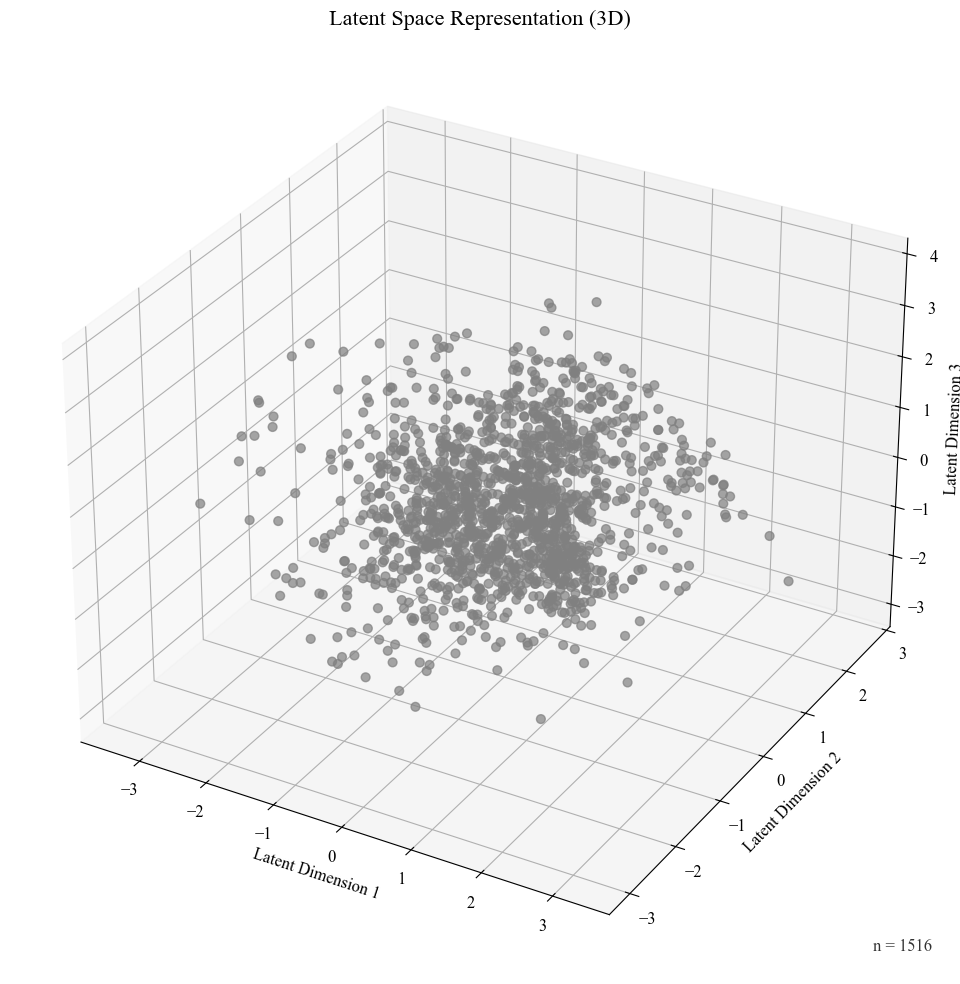

Epochs:  88%|████████▊ | 224/256 [09:42<01:44,  3.28s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 225/256 | Train Loss: 23.6635 | Val Loss: 31.6149


Epochs:  88%|████████▊ | 226/256 [09:47<01:24,  2.82s/it]

Epoch 226/256 | Train Loss: 23.6771 | Val Loss: 32.1895


Epochs:  89%|████████▊ | 227/256 [09:50<01:19,  2.74s/it]

Epoch 227/256 | Train Loss: 23.6401 | Val Loss: 31.8297


Epochs:  89%|████████▉ | 228/256 [09:52<01:10,  2.53s/it]

Epoch 228/256 | Train Loss: 23.7359 | Val Loss: 32.1944


Epochs:  89%|████████▉ | 229/256 [09:54<01:04,  2.40s/it]

Epoch 229/256 | Train Loss: 23.6920 | Val Loss: 31.7326


Epochs:  90%|████████▉ | 230/256 [09:56<00:58,  2.27s/it]

Epoch 230/256 | Train Loss: 23.6212 | Val Loss: 31.7607


Epochs:  90%|█████████ | 231/256 [09:58<00:58,  2.35s/it]

Epoch 231/256 | Train Loss: 23.7058 | Val Loss: 32.4639


Epochs:  91%|█████████ | 232/256 [10:00<00:53,  2.22s/it]

Epoch 232/256 | Train Loss: 23.7153 | Val Loss: 31.8610


Epochs:  91%|█████████ | 233/256 [10:03<00:54,  2.36s/it]

Epoch 233/256 | Train Loss: 23.8349 | Val Loss: 31.5501


Epochs:  91%|█████████▏| 234/256 [10:05<00:49,  2.25s/it]

Epoch 234/256 | Train Loss: 23.6861 | Val Loss: 32.3752


Epochs:  92%|█████████▏| 235/256 [10:07<00:49,  2.34s/it]

Epoch 235/256 | Train Loss: 23.7396 | Val Loss: 31.7886


Epochs:  92%|█████████▏| 236/256 [10:09<00:44,  2.24s/it]

Epoch 236/256 | Train Loss: 23.7637 | Val Loss: 32.4026


Epochs:  93%|█████████▎| 237/256 [10:12<00:44,  2.34s/it]

Epoch 237/256 | Train Loss: 23.7906 | Val Loss: 31.8472


Epochs:  93%|█████████▎| 238/256 [10:14<00:40,  2.25s/it]

Epoch 238/256 | Train Loss: 23.6945 | Val Loss: 31.7772


Epochs:  93%|█████████▎| 239/256 [10:17<00:39,  2.34s/it]

Epoch 239/256 | Train Loss: 23.7863 | Val Loss: 32.0083
Epoch 240/256 | Train Loss: 23.7357 | Val Loss: 32.1857
Generated signals shape: (32, 256)
Epoch 240/256 | Train Loss: 23.7357 | Val Loss: 32.1857
Generated signals shape: (32, 256)


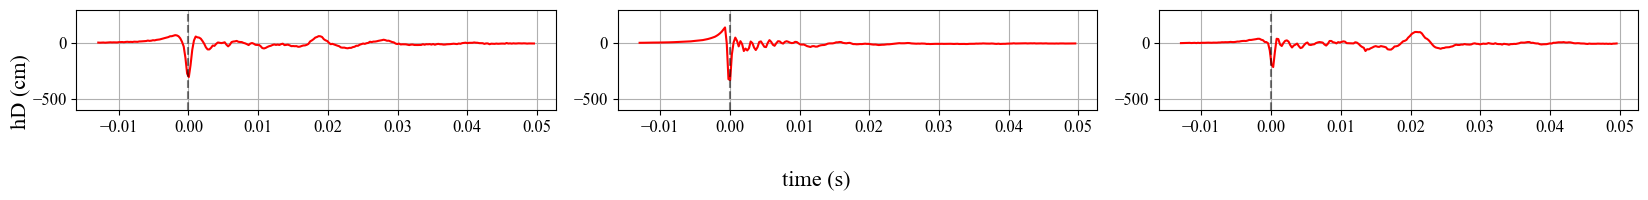

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


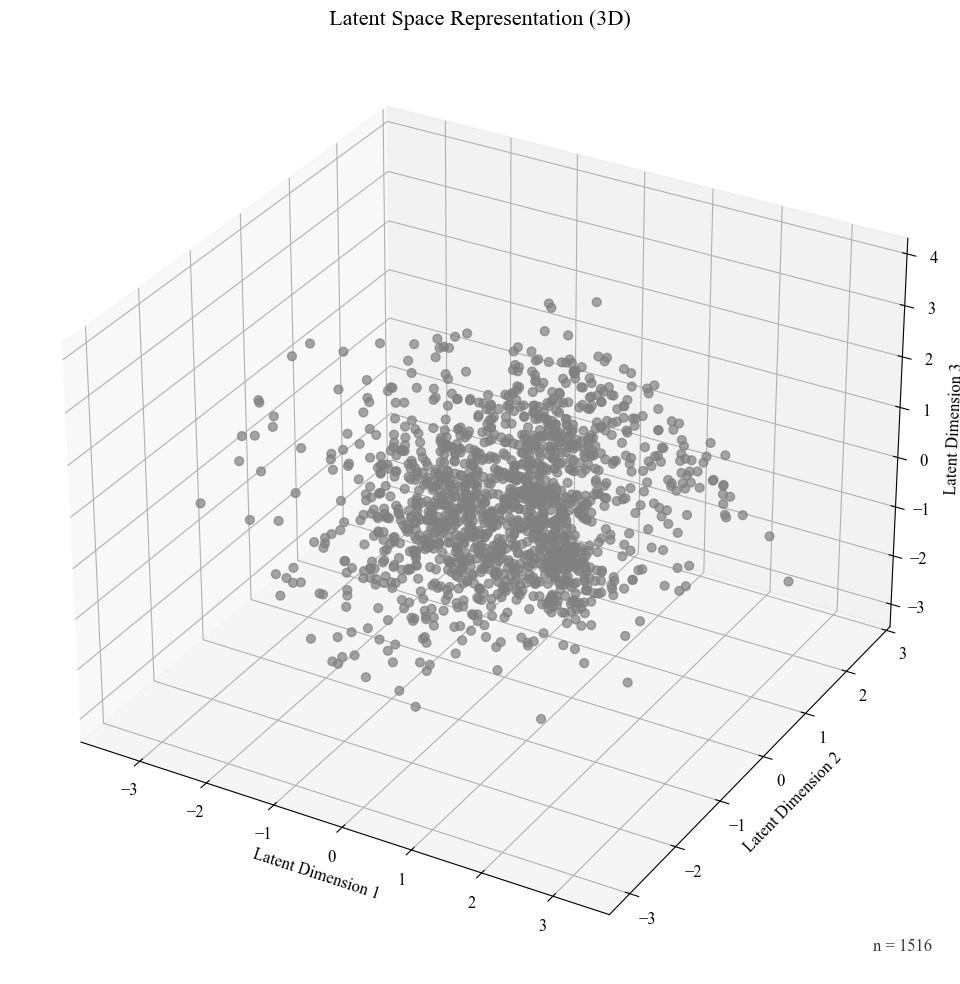

Epochs:  94%|█████████▍| 240/256 [10:21<00:45,  2.87s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 

Epoch 241/256 | Train Loss: 23.9086 | Val Loss: 31.8051


Epochs:  95%|█████████▍| 242/256 [10:25<00:36,  2.57s/it]

Epoch 242/256 | Train Loss: 23.7511 | Val Loss: 31.7777


Epochs:  95%|█████████▍| 243/256 [10:27<00:31,  2.40s/it]

Epoch 243/256 | Train Loss: 23.7248 | Val Loss: 31.7728


Epochs:  95%|█████████▌| 244/256 [10:29<00:27,  2.26s/it]

Epoch 244/256 | Train Loss: 23.7435 | Val Loss: 32.3743


Epochs:  96%|█████████▌| 245/256 [10:31<00:23,  2.17s/it]

Epoch 245/256 | Train Loss: 23.7365 | Val Loss: 32.1816


Epochs:  96%|█████████▌| 246/256 [10:33<00:21,  2.10s/it]

Epoch 246/256 | Train Loss: 23.8296 | Val Loss: 32.4585


Epochs:  96%|█████████▋| 247/256 [10:36<00:21,  2.40s/it]

Epoch 247/256 | Train Loss: 23.9598 | Val Loss: 31.6022


Epochs:  97%|█████████▋| 248/256 [10:39<00:20,  2.51s/it]

Epoch 248/256 | Train Loss: 23.7999 | Val Loss: 32.0432


Epochs:  97%|█████████▋| 249/256 [10:42<00:18,  2.58s/it]

Epoch 249/256 | Train Loss: 23.8787 | Val Loss: 32.1039


Epochs:  98%|█████████▊| 250/256 [10:45<00:15,  2.59s/it]

Epoch 250/256 | Train Loss: 23.8694 | Val Loss: 32.2194


Epochs:  98%|█████████▊| 251/256 [10:47<00:12,  2.42s/it]

Epoch 251/256 | Train Loss: 23.8496 | Val Loss: 31.8270


Epochs:  98%|█████████▊| 252/256 [10:48<00:09,  2.28s/it]

Epoch 252/256 | Train Loss: 23.9425 | Val Loss: 32.5658


Epochs:  99%|█████████▉| 253/256 [10:52<00:07,  2.66s/it]

Epoch 253/256 | Train Loss: 23.8067 | Val Loss: 32.0297


Epochs:  99%|█████████▉| 254/256 [10:55<00:05,  2.71s/it]

Epoch 254/256 | Train Loss: 23.8287 | Val Loss: 32.0389


Epochs: 100%|█████████▉| 255/256 [10:57<00:02,  2.42s/it]

Epoch 255/256 | Train Loss: 23.8193 | Val Loss: 32.3165
Epoch 256/256 | Train Loss: 23.9314 | Val Loss: 32.5909
Generated signals shape: (32, 256)
Epoch 256/256 | Train Loss: 23.9314 | Val Loss: 32.5909
Generated signals shape: (32, 256)


/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


Epochs: 100%|██████████| 256/256 [11:01<00:00,  2.58s/it]

Training Time: 11.02min
Saved VAE model to outdir/generator_weights.pt


In [8]:
vae_trainer = Trainer(toy=toy, noise=True, curriculum=True)
vae_trainer.train()

### Display Results

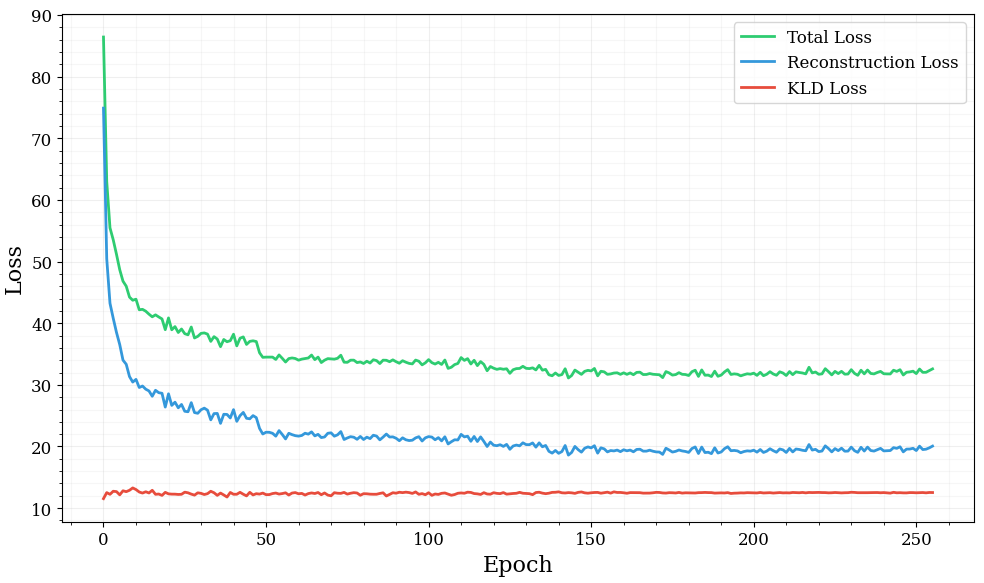

In [9]:
vae_trainer.display_results()

In [10]:
# plot_latent_morph_up_and_down(
#     vae_trainer.vae,
#     signal_1=ccsn_dataset.__getitem__(800)[0],
#     signal_2=ccsn_dataset.__getitem__(600)[0],
#     max_value=vae_trainer.training_dataset.max_strain,
#     train_dataset=CCSNData(),
#     steps=1
# )

Execution Time: 0.12352180480957031 seconds


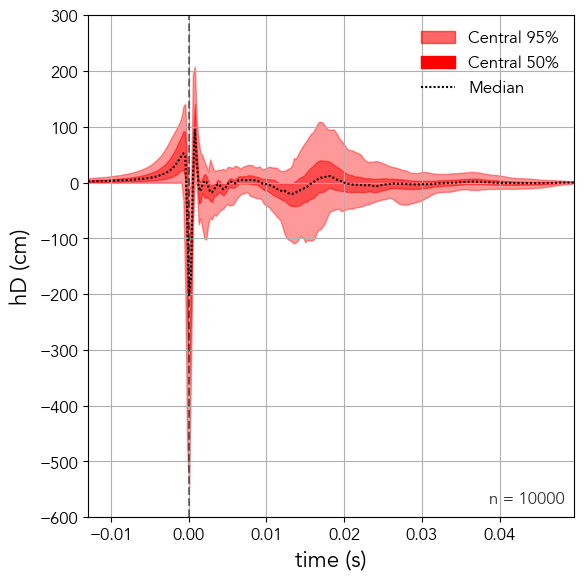

In [11]:
vae_trainer.plot_generated_signal_distribution(
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


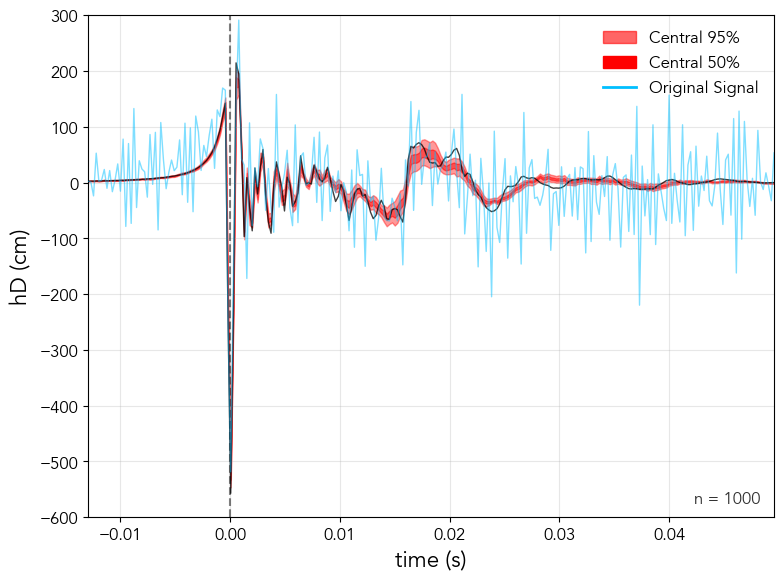

In [12]:
index = 85

val_idx = vae_trainer.validation_sampler.indices[index]
signal, noisy_signal, params = vae_trainer.val_loader.dataset.__getitem__(val_idx)

plot_reconstruction_distribution(
    vae=vae_trainer.vae,
    noisy_signal=noisy_signal,
    true_signal=signal,
    max_value=vae_trainer.validation_dataset.max_strain,
    num_samples=1000,
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

In [13]:
vae_trainer.save_models()

Saved VAE model to outdir/generator_weights.pt


In [59]:
import math
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.utils.defaults import DEVICE, Z_DIM

from nflows.distributions.normal import StandardNormal
from nflows.transforms import CompositeTransform, ReversePermutation, MaskedAffineAutoregressiveTransform
from nflows.flows import Flow
import torch.optim as optim


def train_npe_with_vae(vae_trainer, num_epochs=20, batch_size=32, lr=1e-4, flow=None):
    """
    Train a MaskedAutoregressiveFlow to estimate p(params | latent)
    """

    vae = vae_trainer.vae
    vae.eval()  # freeze VAE
    param_dim = 4

    num_layers = 10

    # model starts here
    base_dist = StandardNormal(shape=[param_dim])

    # composite transform
    transforms = []
    for i in range(num_layers):
        if i % 2 == 0:
            transforms.append(ReversePermutation(features=param_dim))
        transforms.append(
            MaskedAffineAutoregressiveTransform(
                features=param_dim,
                hidden_features=128,
                context_features=Z_DIM,
            )
        )

    transform = CompositeTransform(transforms)

    # create flow on CPU first, in float32
    flow = Flow(transform, base_dist)

    # move to device explicitly, MPS requires float32
    flow = flow.to(DEVICE, dtype=torch.float32)

    # model ends here

    optimizer = optim.Adam(flow.parameters(), lr=lr)

    ccsn_loader = DataLoader(
        CCSNData(noise=True, curriculum=False),
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
    )

    for epoch in range(num_epochs):
        total_loss = 0.0

        for batch_idx, (signal, noisy_signal, params) in enumerate(ccsn_loader):
            signal = signal.to(DEVICE).float()
            noisy_signal = noisy_signal.to(DEVICE).float()
            params = params.to(DEVICE).float()
            # take only the first param
            # params = params[:, :, 0:1]
            params = torch.log(params + 1e-8)  # log-transform
            # params = params[:, :, 0]

            # Encode signal into latent space
            with torch.no_grad():
                _, mean, log_var = vae(noisy_signal)
                mean = mean.view(mean.size(0), -1)
                log_var = log_var.view(log_var.size(0), -1)
                # z_latent = vae.reparameterization(mean, log_var)
                # z_latent = z_latent.view(z_latent.size(0), -1)


            # p(params | z)
            params = params.view(params.size(0), -1) 
            # z_latent = z_latent.view(z_latent.size(0), -1) 

            optimizer.zero_grad(set_to_none=True)

            log_prob = flow.log_prob(params, context=mean) # this conditions the flow on the latent variable z
            loss = -log_prob.mean()

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}] | Flow NLL: {total_loss / len(ccsn_loader):.4f}")

    return flow

npe_flow = train_npe_with_vae(vae_trainer, num_epochs=400, batch_size=32, lr=5e-4)

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


Epoch [1/400] | Flow NLL: 8.1910
Epoch [2/400] | Flow NLL: 4.6639
Epoch [2/400] | Flow NLL: 4.6639
Epoch [3/400] | Flow NLL: 2.8925
Epoch [3/400] | Flow NLL: 2.8925
Epoch [4/400] | Flow NLL: 1.7361
Epoch [4/400] | Flow NLL: 1.7361
Epoch [5/400] | Flow NLL: 2.3999
Epoch [5/400] | Flow NLL: 2.3999
Epoch [6/400] | Flow NLL: 0.9700
Epoch [6/400] | Flow NLL: 0.9700
Epoch [7/400] | Flow NLL: 0.6550
Epoch [7/400] | Flow NLL: 0.6550
Epoch [8/400] | Flow NLL: 0.3791
Epoch [8/400] | Flow NLL: 0.3791
Epoch [9/400] | Flow NLL: 0.2549
Epoch [9/400] | Flow NLL: 0.2549
Epoch [10/400] | Flow NLL: 0.1940
Epoch [10/400] | Flow NLL: 0.1940
Epoch [11/400] | Flow NLL: -0.2482
Epoch [11/400] | Flow NLL: -0.2482
Epoch [12/400] | Flow NLL: -0.2573
Epoch [12/400] | Flow NLL: -0.2573
Epoch [13/400] | Flow NLL: -0.6545
Epoch [13/400] | Flow NLL: -0.6545
Epoch [14/400] | Flow NLL: -0.6251
Epoch [14/400] | Flow NLL: -0.6251
Epoch [15/400] | Flow NLL: -0.5139
Epoch [15/400] | Flow NLL: -0.5139
Epoch [16/400] | Flow

### Sample

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_data.py:338: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


True params: tensor([0.0742, 6.4520, 0.2779, 5.0000])
[0.07417087 6.452049   0.2779196  5.        ]


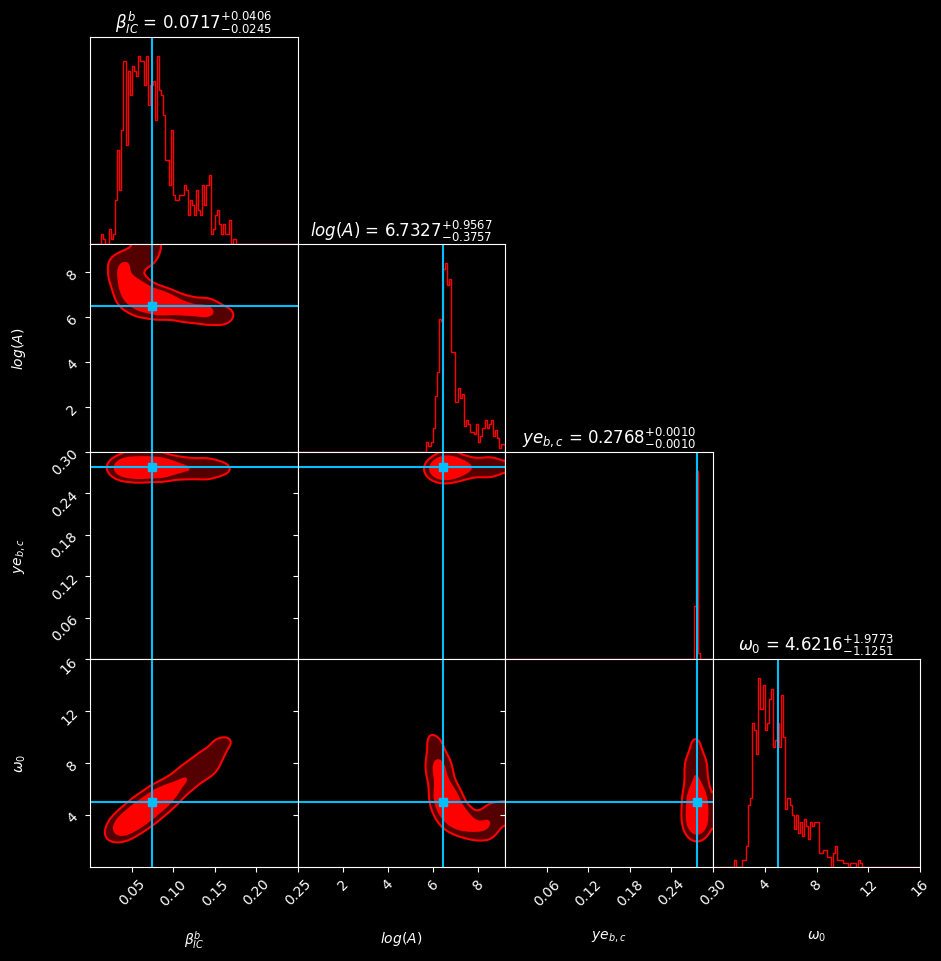

In [69]:
import torch
import matplotlib.pyplot as plt

from starccato_flow.plotting.plotting_defaults import GENERATED_SIGNAL_COLOUR, SIGNAL_COLOUR

vae_trainer.vae.eval()
npe_flow.eval()

from torch.utils.data import DataLoader
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.utils.defaults import DEVICE

index = 120

signal = vae_trainer.training_dataset.__getitem__(index)[0]
noisy_signal = vae_trainer.training_dataset.__getitem__(index)[1]
params = vae_trainer.training_dataset.__getitem__(index)[2]

# Ensure batch dimension [B, C, T]
if noisy_signal.dim() == 2:
    noisy_signal = noisy_signal.unsqueeze(0)

with torch.no_grad():
    noisy_signal = noisy_signal.to(DEVICE).float()
    signal = signal.to(DEVICE).float()
    _, mean, log_var = vae_trainer.vae(noisy_signal)
    # z = vae_trainer.vae.reparameterization(mean, torch.exp(0.5 * log_var))
    # recon = vae_trainer.vae.decoder(z)
    # _, mean, log_var = vae_trainer.vae(recon)

    # Sample from flow conditioned on z
    num_draws = 1000

    context = mean.view(1, -1)
    samples = npe_flow.sample(num_samples=num_draws, context=context)
    samples = samples.reshape(num_draws, -1)  # -> [num_draws, 2]

    samples_cpu = samples.detach().cpu()
    samples_cpu[:, [0, 2, 3]] = torch.exp(samples_cpu[:, [0, 2, 3]])  # Transform back to positive space
    samples_cpu = samples_cpu.numpy()
    true_params = params.detach().cpu() if torch.is_tensor(params) else params
    true_params = true_params.flatten()  # Flatten to [2] from [1, 2]
    true_params[1] = torch.log(true_params[1] + 1e-8)  # log-transform
    
    print("True params:", true_params)
    # print("Mean predicted:", samples_cpu.mean(dim=0))
    # print("Std predicted:", samples_cpu.std(dim=0))
    
    # Plot histogram of first parameter
    # plt.figure(figsize=(10, 6))
    # plt.hist(samples_cpu[:, 0].numpy(), bins=50, alpha=0.7, edgecolor='black')
    # plt.axvline(true_params[0].item(), color='red', linestyle='--', linewidth=2, label=f'True value: {true_params[0].item():.3f}')
    # plt.axvline(samples_cpu[:, 0].mean().item(), color='green', linestyle='--', linewidth=2, label=f'Predicted mean: {samples_cpu[:, 0].mean().item():.3f}')
    # plt.xlim(0, 0.25)
    # plt.xlabel('Parameter 1 Value')
    # plt.ylabel('Frequency')
    # plt.title('Posterior Distribution of Parameter 1')
    # plt.legend()
    # plt.grid(True, alpha=0.3)
    # plt.show()

    # # Plot histogram of first parameter
    # plt.figure(figsize=(10, 6))
    # plt.hist(samples_cpu[:, 1].numpy(), bins=5000, alpha=0.7, edgecolor='black')
    # plt.axvline(true_params[1].item(), color='red', linestyle='--', linewidth=2, label=f'True value: {true_params[1].item():.3f}')
    # plt.axvline(samples_cpu[:, 1].mean().item(), color='green', linestyle='--', linewidth=2, label=f'Predicted mean: {samples_cpu[:, 1].mean().item():.3f}')
    # plt.xlim(0, 10000)
    # plt.xlabel('Parameter 1 Value')
    # plt.ylabel('Frequency')
    # plt.title('Posterior Distribution of Parameter 1')
    # plt.legend()
    # plt.grid(True, alpha=0.3)
    # plt.show()


plt.rcParams['figure.facecolor'] = 'none' # Transparent figure background
plt.rcParams['axes.facecolor'] = 'black' # Black subplot backgrounds
plt.rcParams['savefig.facecolor'] = 'none' # Also transparent when saving
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

truth_colour = SIGNAL_COLOUR
distribution_colour = GENERATED_SIGNAL_COLOUR

print(true_params.detach().cpu().numpy())


figure = corner.corner(
    samples_cpu,
    labels=[
        r"$\beta_{IC}^b$",
        r"$log(A)$",
        r"$ye_{b,c}$",
        r"$\omega_0$"
    ],
    range=[(0, 0.25), (0, math.log(10000)), (0, 0.3), (0, 16)],
    truths=true_params[:4].numpy(),
    truth_color=truth_colour,
    show_titles=True,
    title_quantiles=[0.16, 0.5, 0.84],  # ← ADD THIS LINE
    title_fmt='.4f',
    bins=100,
    smooth=3,
    color=distribution_colour,
    hist_kwargs={'density': False, 'alpha': 1.0},
    levels=(0.68, 0.95),
    fill_contours=True,
    plot_datapoints=False
)

# Fill hist patches
for ax in figure.get_axes():
    for patch in ax.patches:
        patch.set_facecolor("white")
        patch.set_alpha(1.0)

# **Make axis lines white**
for ax in figure.get_axes():
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

# Transparent canvas
figure.patch.set_alpha(1.0)

figure.subplots_adjust(hspace=0.0, wspace=0.0)  # adjust spacing

plt.savefig("plots/npe_posterior_corner_plot.svg", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
